In [5]:
import pandas as pd
import pickle
import numpy as np
from scipy.stats import norm
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from scipy import stats

# here we set up all columns
pd.set_option('max_columns', 64)

In [6]:
datafile = open('engagement', 'rb')

eng = pickle.load(datafile)

datafile.close()

In [7]:
#datafile = open('customer_service_reps', 'rb')
datafile = open('customer_service_reps_dr', 'rb')

cust_sev = pickle.load(datafile)

datafile.close()

In [8]:
datafile = open('subscribers', 'rb')

sub = pickle.load(datafile)

datafile.close()

In [302]:
ad_spend = pd.read_csv('advertising_spend.csv', index_col=0)

# customer_service_reps

#datafile = open('customer_service_reps', 'rb')
datafile = open('customer_service_reps_dr', 'rb')

cust_sev = pickle.load(datafile)

datafile.close()

In [17]:
cust_sev.head(5)

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,True
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,True
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,True
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,False
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,True


In [18]:
cust_sev.shape

(2208643, 13)

In [19]:
cust_sev.columns

Index(['customer_service_rep_id', 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period',
       'last_payment', 'next_payment', 'renew'],
      dtype='object')

In [20]:
cust_sev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208643 entries, 4 to 2248413
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   customer_service_rep_id  int64         
 1   subid                    int64         
 2   current_sub_TF           bool          
 3   cancel_date              datetime64[ns]
 4   account_creation_date    datetime64[ns]
 5   num_trial_days           int64         
 6   trial_completed_TF       bool          
 7   billing_channel          object        
 8   revenue_net_1month       float64       
 9   payment_period           int64         
 10  last_payment             datetime64[ns]
 11  next_payment             datetime64[ns]
 12  renew                    bool          
dtypes: bool(3), datetime64[ns](4), float64(1), int64(4), object(1)
memory usage: 191.7+ MB


In [21]:
cust_sev['revenue_net_1month'].unique()

array([ 1.1377,  0.7707,  0.    ,  4.5875,  5.6885,  3.7434,  5.2848,
        3.67  ,  1.1744,  5.138 ,  5.3215,  5.6518,  5.9087,  3.0828,
        6.1289,  6.2023,  3.6333,  4.8811,  3.5232,  6.3124,  3.8168,
        2.3121,  3.8535,  5.9821,  4.5141,  3.0461,  3.4498,  4.9912,
        3.1195,  4.8444,  3.7801,  3.5599,  5.4683,  5.6151,  5.8353,
        4.2572,  4.771 ,  4.2205,  4.7343,  4.3673,  6.0555,  4.9545,
       -0.0367,  4.0003,  5.1013,  2.6424,  2.8993,  3.9636, -0.0734,
        5.0279,  5.505 ,  4.9178,  4.6242,  5.7252,  3.5966,  5.7619,
        5.7986,  6.0922,  4.5508,  5.1747,  5.2114,  3.9269,  5.5417,
        1.3212,  6.0188,  3.4865,  5.872 ,  0.6606,  4.404 ,  4.2939,
        6.1656,  4.6609,  2.0919,  1.3579,  1.2111,  7.1198,  5.0646,
        4.8077,  2.8259,  3.4131,  7.0831,  3.303 ,  4.3306,  2.8626,
        7.5602,  1.0643,  3.8902,  1.2478,  5.9454,  0.734 ,  5.3582,
        3.1562,  4.4407,  1.3946, -0.1101,  0.9542,  4.4774, -0.1835,
        2.9727,  6.2

## Descriptive Analysis

In [22]:
# There are 1369360 users in total in the customer_service_reps data
cust_sev['subid'].nunique()

1369360

In [23]:
cust_sev['num_trial_days'].unique()

array([ 7, 14,  0], dtype=int64)

In [24]:
cust_sev['billing_channel'].unique()

array(['itunes', 'google', 'OTT'], dtype=object)

### Data Questions

<b>Cancel_date</b>: 
There are 153 unique users in the customer_service_reps have cancel_date earlier than their account_creation_date

In [25]:
# cust_sev.head(50)

In [26]:
"""dq_a = cust_sev[cust_sev['cancel_date'].isna() == 0]"""

"dq_a = cust_sev[cust_sev['cancel_date'].isna() == 0]"

In [27]:
"""dq_a = dq_a[ dq_a['cancel_date'] < dq_a['account_creation_date']]
dq_a[['subid','cancel_date','account_creation_date']].reset_index(drop=True).head()"""

"dq_a = dq_a[ dq_a['cancel_date'] < dq_a['account_creation_date']]\ndq_a[['subid','cancel_date','account_creation_date']].reset_index(drop=True).head()"

In [28]:
"""dq_a['billing_channel'].unique()"""

"dq_a['billing_channel'].unique()"

<b>Null Value</b>: 
We need to manually fill in the null value of the <b>renew</b> column for <b>all three channels</b>

In [29]:
"""dq_b = cust_sev[cust_sev['billing_channel'] == 'google']
dq_b[['subid','billing_channel','last_payment','next_payment','payment_period','renew']].head(4)"""

"dq_b = cust_sev[cust_sev['billing_channel'] == 'google']\ndq_b[['subid','billing_channel','last_payment','next_payment','payment_period','renew']].head(4)"

In [30]:
"""dq_c = cust_sev[cust_sev['billing_channel'] == 'OTT']
dq_c = dq_c[np.logical_and(dq_c['next_payment'].isna() == True, dq_c['payment_period'] == 0)]
dq_c[['subid','billing_channel','last_payment','next_payment','payment_period','renew']].head()"""

"dq_c = cust_sev[cust_sev['billing_channel'] == 'OTT']\ndq_c = dq_c[np.logical_and(dq_c['next_payment'].isna() == True, dq_c['payment_period'] == 0)]\ndq_c[['subid','billing_channel','last_payment','next_payment','payment_period','renew']].head()"

In [31]:
"""dq_d = cust_sev[cust_sev['billing_channel'] == 'itunes']
dq_d = dq_d[np.logical_or(dq_d['next_payment'].isna() == True, dq_d['payment_period'] == 0)]
dq_d[['subid','billing_channel','last_payment','next_payment','payment_period','renew']].head()"""

"dq_d = cust_sev[cust_sev['billing_channel'] == 'itunes']\ndq_d = dq_d[np.logical_or(dq_d['next_payment'].isna() == True, dq_d['payment_period'] == 0)]\ndq_d[['subid','billing_channel','last_payment','next_payment','payment_period','renew']].head()"

In [32]:
cust_sev.nunique()

customer_service_rep_id       1031
subid                      1369360
current_sub_TF                   2
cancel_date                 758040
account_creation_date      1303669
num_trial_days                   3
trial_completed_TF               2
billing_channel                  3
revenue_net_1month             286
payment_period                  13
last_payment                736390
next_payment                228115
renew                            2
dtype: int64

#### Solutions

## Preprocessing the data

In [33]:
"""
def renew_filling(period, nxt):
    if str(nxt) == 'NaT':
        return(False)
    else:
        return(True)
"""

"\ndef renew_filling(period, nxt):\n    if str(nxt) == 'NaT':\n        return(False)\n    else:\n        return(True)\n"

In [34]:
# cust_sev['renew'] = cust_sev.apply(lambda row: renew_filling( row['payment_period'], row['next_payment'] ), axis = 1)

In [35]:
# now that we've preprocessed the dataset a bit, how can we easily write it to a file?
# let us use pickle to do that in 2-3 easy steps

# 1st: open a file in "write binary" (wb) mode
datafile = open("customer_service_reps_dr", "wb")

# 2nd: call pickle.dump(). First argument: the data structure or variable to be saved to the file
# Second argument: the file handle (or "file reference") opened above in "wb" mode

pickle.dump(cust_sev, datafile)

# 3rd: close that file to make sure everything was written to disk!
datafile.close()

## OTT Channel

There are three billing channels \
For <b>OTT channel</b>, there are only 2 trial days, <b>14 and 0</b> which we can use for <b>AB_Testing</b>

In [9]:
ott = cust_sev[ cust_sev['billing_channel'] == 'OTT'].reset_index(drop=True)

In [10]:
ott['num_trial_days'].unique()

array([14,  0], dtype=int64)

In [11]:
ott['renew'].unique()

array([False,  True])

In [12]:
ott.columns

Index(['customer_service_rep_id', 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period',
       'last_payment', 'next_payment', 'renew'],
      dtype='object')

In [13]:
ott.shape

(1848663, 13)

### Preprocessing the data


In [14]:
# we delete those users whose cancel dates are ahead of their account creation date
pre_a = ott[ott['cancel_date'].isna() == 0]

pre_a = pre_a[ pre_a['cancel_date'] < pre_a['account_creation_date']]
pre_a[['subid','cancel_date','account_creation_date']].reset_index(drop=True).head()

error_id = list(pre_a['subid'])

ott = ott[~ott['subid'].isin(error_id)].reset_index(drop=True)

In [15]:
ott['account_created_YM'] = ott['account_creation_date'].dt.strftime('%Y-%m')

In [16]:
ott.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,account_created_YM
0,33513851,28948735,False,2020-04-06 19:21:05,2020-03-27 23:59:39,14,False,OTT,0.0000,0,2020-03-27 23:59:39,NaT,False,2020-03
1,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,2020-03-28 00:05:20,NaT,False,2020-03
2,31856201,27800927,True,NaT,2020-03-27 23:59:04,14,True,OTT,4.5875,0,2020-03-28 00:05:20,2020-04-11 11:05:24,True,2020-03
3,31856201,27800927,True,NaT,2020-03-27 23:59:04,14,True,OTT,4.5875,1,2020-04-11 11:05:24,NaT,False,2020-03
4,34244883,26594255,False,2020-04-02 23:06:20,2020-03-27 23:59:00,14,False,OTT,0.0000,0,2020-03-28 08:35:56,NaT,False,2020-03


### Conducting the A/B testing

In [17]:
ott.groupby('subid')[['last_payment']].count()['last_payment'].sum()

1848510

In [18]:
a = ott[ott.payment_period == 0]
a.groupby('num_trial_days')['subid'].size()

num_trial_days
0        6801
14    1202918
Name: subid, dtype: int64

In [19]:
a.groupby('num_trial_days')['renew'].sum()

num_trial_days
0       5270.0
14    488548.0
Name: renew, dtype: float64

In [20]:
ott_calc = ott[ott['payment_period'] == 0].reset_index(drop=True)
#ott_calc = ott_calc[ott_calc['trial_completed_TF'] != False].reset_index(drop=True)

#### ott_test_a is for the purpose of spotting another data discrepancies about num_trial_day and trial_day_complted_TF and renew

In [30]:
ott_test_a.columns

Index(['customer_service_rep_id', 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period',
       'last_payment', 'next_payment', 'renew', 'account_created_YM'],
      dtype='object')

In [37]:
ott_test_a = ott_calc[np.logical_and( ott_calc['renew'] == True, ott_calc['num_trial_days'] == 0) ]
ott_test_a[ott_test_a['trial_completed_TF'] == True][['subid','current_sub_TF', 'cancel_date', 'num_trial_days', 'trial_completed_TF', 'payment_period',
       'last_payment', 'next_payment', 'renew']]

,subid,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,payment_period,last_payment,next_payment,renew
737,20273414,True,NaT,0,True,0,2020-03-27 20:04:18,2020-04-11 14:22:46,True
1619,24897731,True,NaT,0,True,0,2020-03-27 15:51:19,2020-04-11 14:22:46,True
1682,23223227,True,NaT,0,True,0,2020-03-27 15:33:09,2020-03-29 14:11:14,True
1769,23206537,True,NaT,0,True,0,2020-03-27 15:08:59,2020-04-11 11:05:23,True
4137,29448311,True,NaT,0,True,0,2020-03-26 18:31:50,2020-04-03 14:00:18,True
...,...,...,...,...,...,...,...,...,...
1002011,23428414,True,NaT,0,True,0,2019-07-24 00:06:44,2019-07-27 10:07:48,True
1002046,25521743,True,NaT,0,True,0,2019-07-23 23:46:44,2019-07-26 10:32:30,True
1002052,25923636,False,2019-12-18 10:02:35,0,True,0,2019-07-23 23:44:39,2019-08-04 14:34:16,True
1002116,26777077,False,2020-03-26 05:08:39,0,True,0,2019-07-23 23:15:34,2019-07-25 14:34:30,True


In [34]:
ott_test_a[ott_test_a['trial_completed_TF'] == False][['subid','current_sub_TF', 'cancel_date', 'num_trial_days', 'trial_completed_TF', 'payment_period',
       'last_payment', 'next_payment', 'renew']]

,subid,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,payment_period,last_payment,next_payment,renew
15842,21146065,False,NaT,0,False,0,2020-03-22 05:56:30,2020-03-22 06:05:19,True
32080,23092140,False,NaT,0,False,0,2020-03-18 00:04:16,2020-03-18 06:26:07,True
33622,26321222,False,2020-03-17 12:44:09,0,False,0,2020-03-17 03:21:25,2020-03-17 06:48:00,True
183208,21305999,False,2020-02-29 17:45:43,0,False,0,2020-02-28 06:19:15,2020-02-28 07:37:03,True
225876,20175390,False,NaT,0,False,0,2020-02-21 03:10:26,2020-02-21 06:19:31,True
442798,28477738,False,NaT,0,False,0,2019-12-18 02:27:10,2019-12-18 06:03:04,True
450118,26682516,False,NaT,0,False,0,2019-12-15 01:10:07,2019-12-15 05:50:32,True
701515,21632248,False,NaT,0,False,0,2019-10-27 00:02:06,2019-10-27 05:56:18,True
764697,27038535,False,2019-10-08 03:54:53,0,False,0,2019-10-08 03:36:01,2019-10-08 04:08:02,True
829325,23074720,False,NaT,0,False,0,2019-09-19 06:56:11,2019-09-19 07:33:00,True


In [209]:
ott_sum = ott_calc.groupby(['account_created_YM', 'num_trial_days'])[['subid','renew']].agg({'subid':'count','renew':'sum'}).rename(columns={'subid': 'num_exposures', 'renew': 'num_actual_trial'})

In [210]:
ott_sum

num_exposures  num_actual_trial
account_created_YM num_trial_days                                 
2019-06            14                      19723            9189.0
2019-07            0                         277             235.0
                   14                     206724           88620.0
2019-08            0                         746             537.0
                   14                      96678           39016.0
2019-09            0                         985             746.0
                   14                      97394           40406.0
2019-10            0                         884             667.0
                   14                     102235           39438.0
2019-11            0                         847             688.0
                   14                     175245           70665.0
2019-12            0                         932             744.0
                   14                     115814           44637.0
2020-01            0                         816             645.0
                   14                      70988           29310.0
2020-02            0                         752             598.0
                   14                     150829           61248.0
2020-03            0                         562             410.0
                   14                     167288           66019.0

In [1]:
ott[np.logical_and( ott['renew'] == True, ott['trial_completed_TF'] == False) ]

NameError: name 'ott' is not defined

In [211]:
ott_sum['conversion_rate'] = ott_sum['num_actual_trial'] / ott_sum['num_exposures']

In [212]:
ott_sum_edited = ott_sum.reset_index()

In [213]:
ott_sum_edited['account_created_YM'].unique()

array(['2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
       '2019-12', '2020-01', '2020-02', '2020-03'], dtype=object)

In [214]:
ott_sum_edited.head()

,account_created_YM,num_trial_days,num_exposures,num_actual_trial,conversion_rate
0,2019-06,14,19723,9189.0,0.465903
1,2019-07,0,277,235.0,0.848375
2,2019-07,14,206724,88620.0,0.428688
3,2019-08,0,746,537.0,0.719839
4,2019-08,14,96678,39016.0,0.403566


In [215]:
ott_sum_edited.columns = ['account_created_YM', 'trial_days', 'exposured_users',
       'converted_users', 'conversion_rate']

In [216]:
pt_3 = ott_sum_edited[ott_sum_edited['trial_days'] == 14].pivot(index='account_created_YM', columns='trial_days', values=['exposured_users','converted_users'] )

Text(0, 0.5, 'number of users')

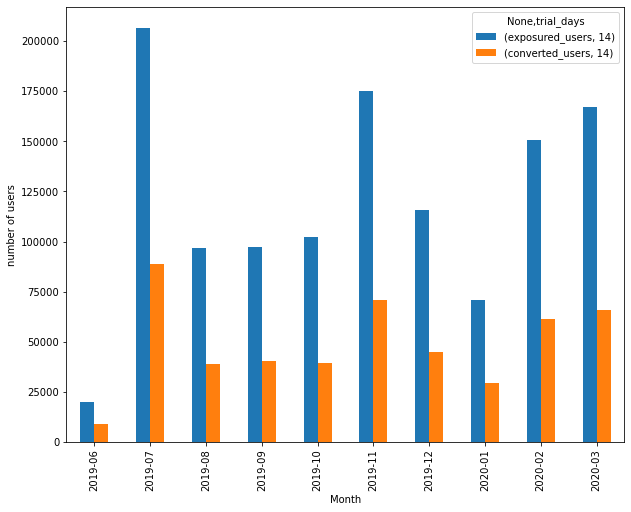

In [217]:
plot_3 = pt_3.plot(kind='bar', figsize=(10,8))

plot_3.set_xlabel("Month", rotation=0)
plot_3.set_ylabel('number of users')

In [218]:
pt_2 = ott_sum_edited[ott_sum_edited['trial_days'] == 0].pivot(index='account_created_YM', columns='trial_days', values=['exposured_users','converted_users'] )

Text(0, 0.5, 'number of users')

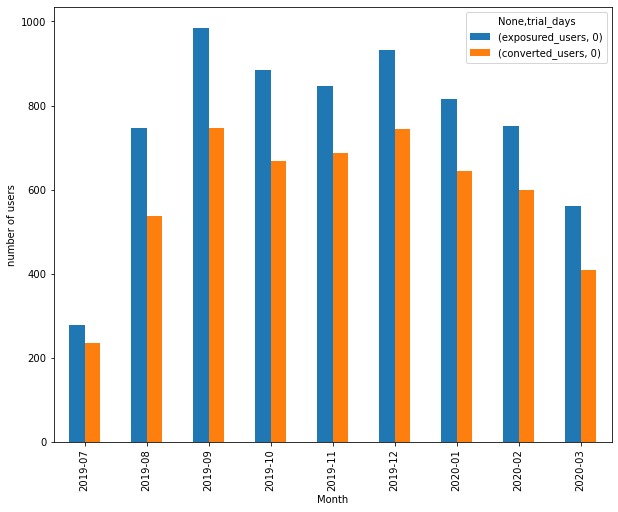

In [219]:
plot_4 = pt_2.plot(kind='bar', figsize=(10,8))
plot_4.set_xlabel("Month")
plot_4.set_ylabel('number of users')

In [201]:
xiagaogao = cust_sev[cust_sev['trial_completed_TF'] == False]

In [206]:
xiagaogao[ xiagaogao['renew'] == True]['num_trial_days'].unique()

array([0], dtype=int64)

In [220]:
ott_sum_edited

,account_created_YM,trial_days,exposured_users,converted_users,conversion_rate
0,2019-06,14,19723,9189.0,0.465903
1,2019-07,0,277,235.0,0.848375
2,2019-07,14,206724,88620.0,0.428688
3,2019-08,0,746,537.0,0.719839
4,2019-08,14,96678,39016.0,0.403566
5,2019-09,0,985,746.0,0.757360
6,2019-09,14,97394,40406.0,0.414872
7,2019-10,0,884,667.0,0.754525
8,2019-10,14,102235,39438.0,0.385758
9,2019-11,0,847,688.0,0.812279


In [61]:
ott_sum_edited.columns

Index(['account_created_YM', 'trial_days', 'exposured_users',
       'converted_users', 'conversion_rate'],
      dtype='object')

In [68]:
pivot_table = ott_sum_edited.pivot(index='account_created_YM', columns='trial_days', values='conversion_rate')

In [79]:
pivot_table_2  = ott_sum_edited.pivot(index='account_created_YM', columns='trial_days', values=['conversion_rate','exposured_users'] )

Text(0, 0.5, 'Conversion_rate')

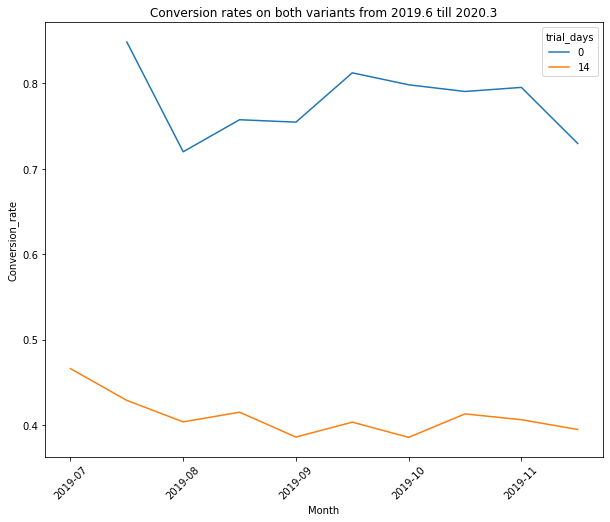

In [65]:
plot_1 = pivot_table.plot( figsize=(10,8), legend=True, 
                            title = "Conversion rates on both variants from 2019.6 till 2020.3")

plot_1.set_xticklabels(pivot_table.index, rotation = 45)
plot_1.set_xlabel("Month")
plot_1.set_ylabel('Conversion_rate')

In [58]:
pivot_table

,0,14,exposed_users_0,exposed_users_14
account_created_YM,,,,
2019-06,NaN,0.465903,NaN,19723.0
2019-07,0.848375,0.428688,277.0,206724.0
2019-08,0.719839,0.403566,746.0,96678.0
2019-09,0.757360,0.414872,985.0,97394.0
2019-10,0.754525,0.385758,884.0,102235.0
2019-11,0.812279,0.403235,847.0,175245.0
2019-12,0.798283,0.385420,932.0,115814.0
2020-01,0.790441,0.412887,816.0,70988.0
2020-02,0.795213,0.406076,752.0,150829.0


In [81]:
pivot_table_2

conversion_rate           exposured_users          
trial_days                      0         14              0         14
account_created_YM                                                    
2019-06                        NaN  0.465903             NaN   19723.0
2019-07                   0.848375  0.428688           277.0  206724.0
2019-08                   0.719839  0.403566           746.0   96678.0
2019-09                   0.757360  0.414872           985.0   97394.0
2019-10                   0.754525  0.385758           884.0  102235.0
2019-11                   0.812279  0.403235           847.0  175245.0
2019-12                   0.798283  0.385420           932.0  115814.0
2020-01                   0.790441  0.412887           816.0   70988.0
2020-02                   0.795213  0.406076           752.0  150829.0
2020-03                   0.729537  0.394643           562.0  167288.0

### AB Testing set-up

$p_{14}$: conversion rate of 14 trial day for the population \
$p_{0}$: conversion rate of 0 trial day for samples

<b>Null Hopothesis</b> \
$H_{0}$: $p_{0}$ = $p_{14}$

<b>Alternative Hopothesis</b> \
$H_{1}$: $p_{0}$ ≠ $p_{14}$

<b>Alpha Statement</b> \
α = 0.05

<b>Critical Value</b> \
$Z_{0.025}$ = 1.96
$Z_{-0.025}$ = -1.96

<b>Decision Statement</b> \
if Z statistic > 1.96 or < - 1.96, \
we reject the Null Hypothesis \
Else, we will not reject the Null Hypothesis, \
but accept the Alternative Hypothesis

<b>Z statistics: One sample statistical test</b> 


In [68]:
pivot_table_2['z_statistics'] = ( pivot_table_2['conversion_rate'][0] - pivot_table_2['conversion_rate'][14]) / ( np.sqrt( pivot_table_2['conversion_rate'][14] * (1 - pivot_table_2['conversion_rate'][14] ) / pivot_table_2['exposured_users'][0] ) ) 

In [69]:
pivot_table_2

conversion_rate           exposured_users            \
trial_days                       0        14               0        14   
account_created_YM                                                       
2019-06                        NaN  0.465903             NaN   19723.0   
2019-07                   0.848375  0.428688           277.0  206724.0   
2019-08                   0.719839  0.403566           746.0   96678.0   
2019-09                   0.757360  0.414872           985.0   97394.0   
2019-10                   0.754525  0.385758           884.0  102235.0   
2019-11                   0.812279  0.403235           847.0  175245.0   
2019-12                   0.798283  0.385420           932.0  115814.0   
2020-01                   0.790441  0.412887           816.0   70988.0   
2020-02                   0.795213  0.406076           752.0  150829.0   
2020-03                   0.729537  0.394643           562.0  167288.0   

                   z_statistics  
trial_days                       
account_created_YM               
2019-06                     NaN  
2019-07               14.114292  
2019-08               17.607290  
2019-09               21.816351  
2019-10               22.524253  
2019-11               24.267776  
2019-12               25.897522  
2020-01               21.905255  
2020-02               21.729133  
2020-03               16.243079

In [46]:
alpha = 0.05
z_ = stats.norm.ppf(1 - alpha / 2)
z = stats.norm.ppf(alpha / 2)

From a monthly basis, all z statistics show that we should accept the alternative hypothesis the conversion rate of 0 trial day is better than that of 14 trial days

#### Relation between revenue and channel

<b>0_num_trial_days</b>

In [135]:
ott_0 = ott[ ott['num_trial_days'] == 0 ]

In [136]:
ott_0.columns

Index(['customer_service_rep_id', 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period',
       'last_payment', 'next_payment', 'renew', 'account_created_year',
       'account_created_month'],
      dtype='object')

In [137]:
ott_0[ott_0['subid'] == 20002686 ]

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,account_created_year,account_created_month
379040,36435377,20002686,True,NaT,2020-02-14 05:02:48,0,True,OTT,0.4771,0,2020-02-14 05:02:48,2020-02-18 11:05:21,True,2020,2
379041,36435377,20002686,True,NaT,2020-02-14 05:02:48,0,True,OTT,0.4771,1,2020-02-18 11:05:21,2020-03-20 11:05:23,True,2020,2
379042,36435377,20002686,True,NaT,2020-02-14 05:02:48,0,True,OTT,0.4771,2,2020-03-20 11:05:23,2020-04-19 11:05:21,True,2020,2
379043,36435377,20002686,True,NaT,2020-02-14 05:02:48,0,True,OTT,0.4771,3,2020-04-19 11:05:21,NaT,False,2020,2


In [138]:
ott_0['revenue_net_1month'].unique()

array([ 0.    ,  0.6606,  0.734 ,  0.8074,  0.4771,  0.4404,  0.6973,
        0.5138,  0.1101,  3.2296,  4.5875,  1.3212,  0.4037,  0.8441,
        0.6239,  0.7707,  0.367 ,  0.8808,  0.5872,  0.9175, -0.5872,
        0.3303,  0.2936,  0.5505,  1.0276,  1.3946,  0.9909,  0.9542,
        1.7249,  1.468 ,  1.1377,  1.1744,  1.0643])

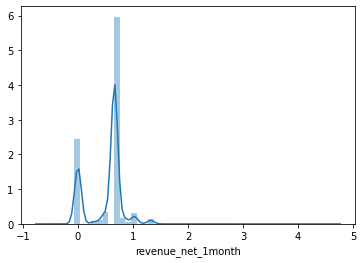

In [156]:
sns.distplot(trial['revenue_net_1month'], hist=True, rug=False)

In [152]:
trial = ott_0.groupby('subid')[['revenue_net_1month']].mean()

In [140]:
ott_last = ott_0.groupby('subid')[['revenue_net_1month', 'payment_period', 'renew']].last().reset_index()
ott_last

,subid,revenue_net_1month,payment_period,renew
0,20002665,0.0000,0,False
1,20002686,0.4771,3,False
2,20007093,0.6606,2,False
3,20009626,0.0000,0,False
4,20011721,0.6606,3,False
...,...,...,...,...
6949,29996520,1.3212,2,False
6950,29997190,0.0000,0,False
6951,29997322,0.4771,2,False
6952,29997405,1.0276,2,False


In [141]:
ott_last = ott_0.groupby('subid')[['revenue_net_1month', 'payment_period', 'renew']].last().reset_index()
ott_last = ott_last[ott_last['revenue_net_1month'] != 0].reset_index(drop=True)

In [158]:
ott_last

,subid,revenue_net_1month,payment_period,renew,total_revenue
0,20002686,0.4771,3,False,1.9084
1,20007093,0.6606,2,False,1.9818
2,20011721,0.6606,3,False,2.6424
3,20012195,0.6606,2,False,1.9818
4,20012651,0.6606,3,False,2.6424
...,...,...,...,...,...
4237,29984925,0.6606,2,False,1.9818
4238,29985381,0.6606,2,False,1.9818
4239,29996520,1.3212,2,False,3.9636
4240,29997322,0.4771,2,False,1.4313


In [142]:
ott_last.payment_period.unique()

array([3, 2, 1, 6, 7, 4, 5, 8, 9], dtype=int64)

In [143]:
ott_last = ott_last[ ott_last['payment_period'] <= 4 ].reset_index(drop=True)

In [144]:
ott_last['payment_period'].unique()

array([3, 2, 1, 4], dtype=int64)

In [145]:
def cacl_ttl_rev(rev, period):
    if period == 4:
        return(rev * period)
    else:
        return( rev * (period + 1) )
    
ott_last['total_revenue'] = ott_last.apply(lambda row: cacl_ttl_rev( row['revenue_net_1month'], row['payment_period'] ), axis = 1)

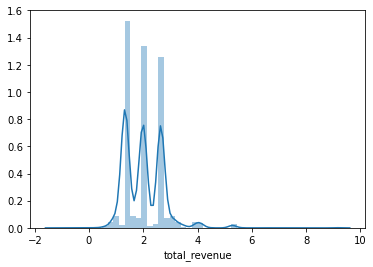

In [157]:
sns.distplot(ott_last['total_revenue'], hist=True, rug=False);

In [148]:
ott_last.total_revenue.unique()

array([ 1.9084,  1.9818,  2.6424,  1.3212,  3.3764,  1.468 ,  0.8808,
        1.7616,  2.7892,  2.0552,  5.2848,  0.8808,  1.4313,  0.9542,
        2.1286,  1.5414,  2.0919,  4.1104,  1.0276,  1.3946,  3.9636,
        1.6882,  2.4222,  1.1744,  2.202 ,  2.936 ,  3.0828,  2.3488,
        2.5323,  0.5872,  1.6148,  3.1929,  3.5232,  2.9727,  1.6515,
        3.5232,  6.8996,  3.2296,  1.5414,  0.8074,  3.8168,  4.404 ,
       -1.1744,  2.2754,  3.9636,  0.9909,  1.2111,  9.175 ,  0.734 ,
        6.4592,  0.2202,  3.67  ,  1.7616,  4.2572,  5.5784,  1.101 ,
        1.2478,  2.4956,  1.835 ])

In [80]:
ott[ ott['subid'] == 20002686]

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,account_created_year,account_created_month
379040,36435377,20002686,True,NaT,2020-02-14 05:02:48,0,True,OTT,0.4771,0,2020-02-14 05:02:48,2020-02-18 11:05:21,True,2020,2
379041,36435377,20002686,True,NaT,2020-02-14 05:02:48,0,True,OTT,0.4771,1,2020-02-18 11:05:21,2020-03-20 11:05:23,True,2020,2
379042,36435377,20002686,True,NaT,2020-02-14 05:02:48,0,True,OTT,0.4771,2,2020-03-20 11:05:23,2020-04-19 11:05:21,True,2020,2
379043,36435377,20002686,True,NaT,2020-02-14 05:02:48,0,True,OTT,0.4771,3,2020-04-19 11:05:21,NaT,False,2020,2


## Google Channel

In [82]:
ggle = cust_sev[ cust_sev['billing_channel'] == 'google'].reset_index(drop=True)
ggle.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,0,2020-03-27 23:46:37,2020-03-28 06:47:31,True
1,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,1,2020-03-28 06:47:31,NaT,False
2,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,0,2020-03-27 23:09:18,2020-03-28 05:09:22,True
3,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,1,2020-03-28 05:09:22,NaT,False
4,38637729,24230000,True,NaT,2020-03-27 22:59:09,0,True,google,1.1377,0,2020-03-27 22:59:09,2020-03-28 04:59:17,True


In [81]:
ggle['num_trial_days'].unique()

array([0], dtype=int64)

## iTunes Channel

### Preprocessing the data


In [39]:
it = cust_sev[ cust_sev['billing_channel'] == 'itunes'].reset_index(drop=True)
it.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,True
1,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,True
2,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,True
3,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,False
4,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,True


In [46]:
it['account_created_year'] = pd.DatetimeIndex(it['account_creation_date']).year
it['account_created_month'] = pd.DatetimeIndex(it['account_creation_date']).month

In [47]:
it.renew.unique()

array([ True, False])

In [48]:
it['num_trial_days'].unique()

array([ 7, 14,  0], dtype=int64)

In [49]:
a = it[it.payment_period == 0]
a.groupby('num_trial_days')['subid'].size()


num_trial_days
0         1
7     64043
14    78209
Name: subid, dtype: int64

In [50]:
a.groupby('num_trial_days')['renew'].sum()

num_trial_days
0         1.0
7     35314.0
14    35048.0
Name: renew, dtype: float64

In [52]:
it_calc = it[it['payment_period'] == 0].reset_index(drop=True)

In [54]:
it_sum = it_calc.groupby(['account_created_year', 'account_created_month', 'num_trial_days'])[['subid','renew']].agg({'subid':'count','renew':'sum'}).rename(columns={'subid': 'num_exposures', 'renew': 'num_actual_trial'})
it_sum

num_exposures  \
account_created_year account_created_month num_trial_days                  
2019                 6                     7                         944   
                     7                     7                       12057   
                     8                     7                        9462   
                     9                     7                        9499   
                                           14                         25   
                     10                    7                        8796   
                                           14                       2613   
                     11                    0                           1   
                                           7                       11857   
                                           14                       4513   
                     12                    7                        9850   
                                           14                       5803   
2020                 1                     7                         499   
                                           14                      21910   
                     2                     7                         466   
                                           14                      22292   
                     3                     7                         613   
                                           14                      21053   

                                                           num_actual_trial  
account_created_year account_created_month num_trial_days                    
2019                 6                     7                          498.0  
                     7                     7                         5989.0  
                     8                     7                         5214.0  
                     9                     7                         5383.0  
                                           14                           8.0  
                     10                    7                         4868.0  
                                           14                        1128.0  
                     11                    0                            1.0  
                                           7                         6625.0  
                                           14                        1944.0  
                     12                    7                         5628.0  
                                           14                        2519.0  
2020                 1                     7                          399.0  
                                           14                        9917.0  
                     2                     7                          325.0  
                                           14                       10033.0  
                     3                     7                          385.0  
                                           14                        9499.0

In [39]:
cust_sev[cust_sev['subid']==27800927][['subid','num_trial_days','payment_period','billing_channel','revenue_net_1month','last_payment', 'next_payment', 'renew']]

,subid,num_trial_days,payment_period,billing_channel,revenue_net_1month,last_payment,next_payment,renew
62,27800927,14,0,OTT,4.5875,2020-03-28 00:05:20,2020-04-11 11:05:24,True
63,27800927,14,1,OTT,4.5875,2020-04-11 11:05:24,NaT,False


In [38]:
cust_sev[cust_sev['subid']==25914865][['subid','num_trial_days','payment_period','billing_channel','revenue_net_1month','last_payment', 'next_payment', 'renew']]

,subid,num_trial_days,payment_period,billing_channel,revenue_net_1month,last_payment,next_payment,renew
8,25914865,14,0,itunes,1.1377,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
9,25914865,14,1,itunes,1.1377,2020-04-02 01:20:25,NaT,NaN


In [70]:
subscribers[subscribers['subid'] == 25914865]

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type


In [23]:
cust_sev.reset_index().head(10)

,index,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
1,5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
2,6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
3,7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
4,8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
5,9,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,1,2020-04-02 01:20:25,NaT,NaN
6,10,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,0,2020-03-27 23:46:37,2020-03-28 06:47:31,NaN
7,11,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,1,2020-03-28 06:47:31,NaT,NaN
8,12,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,0,2020-03-27 23:09:18,2020-03-28 05:09:22,NaN
9,13,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,1,2020-03-28 05:09:22,NaT,NaN


# Engagement

datafile = open('engagement', 'rb')

eng = pickle.load(datafile)

datafile.close()

In [214]:
eng.head(5)

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [65]:
eng.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period'],
      dtype='object')

In [16]:
eng[eng['app_opens'] > 100.0]

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
4707285,27630597,2019-10-06,138.0,0.0,4.0,4.0,1.0,1.0,1.0
5058247,29741706,2019-12-31,113.0,0.0,3.0,4.0,0.0,0.0,2.0
11840698,28083246,2019-09-16,128.0,1.0,4.0,4.0,0.0,1.0,0.0
14033190,28144562,2020-03-11,101.0,0.0,5.0,10.0,0.0,1.0,0.0


In [67]:
eng[['app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started']].max()

app_opens                          138.0
cust_service_mssgs                  39.0
num_videos_completed                24.0
num_videos_more_than_30_seconds     32.0
num_videos_rated                    12.0
num_series_started                   9.0
dtype: float64

## descriptive analysis
in <b>engagement</b> \
there are 135019 unique users

In [218]:
engagement.shape

(2585724, 9)

In [215]:
engagement['subid'].nunique()

135019

In [216]:
eng['year'] = pd.DatetimeIndex(eng['date']).year
eng['month'] = pd.DatetimeIndex(eng['date']).month

In [217]:
eng['year'].unique()

array([2019, 2020], dtype=int64)

In [219]:
eng.drop_duplicates(subset='subid',keep='last',inplace=True)

In [221]:
eng.groupby(['year','month'])[['date']].count()

date
year month       
2019 6        128
     7      13249
     8      11138
     9      11098
     10     12370
     11     13724
     12     15918
2020 1      13216
     2      14075
     3      20380
     4       9723

In [189]:
eng['month'].unique()

array([ 7,  6,  8,  9, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [25]:
eng_1.sort_values(['subid','date'], ascending = True)['subid'].nunique()

4227

In [ ]:
eng_1['subid'].nunique()

In [30]:
list(engagement['payment_period'].unique())

[0.0, 1.0, 2.0, 3.0]

In [12]:
engagement.reset_index().head(5)

,index,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
0,1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
1,2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
2,3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
4,51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


# Subscribers


datafile = open('subscribers', 'rb')

sub = pickle.load(datafile)

datafile.close()

In [4]:
sub['subid'].unique

<bound method Series.unique of 162502    21724479
380374    23383224
496617    26844789
356799    29417030
681701    26723159
            ...   
509326    21434712
229587    25843074
281340    24799085
87198     21308040
598241    20166335
Name: subid, Length: 227628, dtype: int64>

In [50]:
b.iloc[1:3].rename(index={680406: 'c'})

,attribution_survey,attribution_technical
c,NaN,organic
511887,NaN,organic


In [ ]:
b = sub[ sub['attribution_survey'].isnull() == True ][['attribution_survey','attribution_technical']]

In [39]:
bsub[ sub['attribution_survey'].isnull() == True ][['attribution_survey','attribution_technical']]

attribution_survey            NaN
attribution_technical    internal
Name: 284426, dtype: object

In [30]:
sub[['attribution_survey','attribution_technical']].iloc[1:3]

,attribution_survey,attribution_technical
162502,False,False
380374,False,False
496617,False,False
356799,False,False
681701,False,False
...,...,...
509326,False,False
229587,False,False
281340,False,False
87198,False,False


In [24]:
a.rename(index={380374: 'a',496617:'b'})

,attribution_survey,attribution_technical
a,facebook,facebook
b,facebook,organic


In [19]:
sub['attribution_survey'].unique()

array(['facebook', 'tv', 'youtube', 'search', 'referral', 'public_radio',
       'other', 'podcast', 'pinterest', nan, 'social_organic', 'ott',
       'facebook_organic', 'sirius xm', 'affiliate', 'amfm_radio',
       'direct_mail'], dtype=object)

In [17]:
sub['attribution_technical'].unique()

array(['facebook', 'organic', 'search', 'discovery', 'bing', 'email',
       'brand sem intent google', 'google_organic', 'display',
       'affiliate', 'brand sem intent bing', 'internal', 'pinterest',
       'other', 'youtube', 'facebook_organic', 'referral', 'email_blast',
       'podcast', 'vod', 'samsung', 'ott', 'bing_organic', 'direct_mail',
       'quora', 'appstore', 'criteo', 'pinterest_organic',
       'content_greatist', 'influencer', 'twitter', 'playstore', 'tv'],
      dtype=object)

<bound method Series.unique of 162502    21724479
380374    23383224
496617    26844789
356799    29417030
681701    26723159
            ...   
509326    21434712
229587    25843074
281340    24799085
87198     21308040
598241    20166335
Name: subid, Length: 227628, dtype: int64>

In [10]:
sub['country'].unique()

array(['UAE'], dtype=object)

In [83]:
sub.max()

subid                                      29999982
num_weekly_services_utilized                14.3354
weekly_consumption_hour                        76.6
num_ideal_streaming_services                6.95571
retarget_TF                                    True
age                                       8.172e+07
male_TF                                        True
country                                         UAE
attribution_technical                       youtube
months_per_bill_period                            4
plan_type                          low_uae_no_trial
monthly_price                                5.1013
discount_price                               5.0279
account_creation_date           2020-03-27 23:59:06
creation_until_cancel_days                      312
cancel_before_trial_end                        True
trial_end_date                  2020-04-11 00:00:00
initial_credit_card_declined                   True
revenue_net                                 15.6342
join_fee    

In [87]:
sub[np.logical_and( sub['age'] > 100, sub['age'] < 5000 )][['subid', 'age']].head()

,subid,age
628003,29067453,1955.0
3846,24614444,1950.0
114011,27685643,1957.0
403463,22568442,1969.0
377257,28637667,165.0


In [103]:
b = eng.drop_duplicates(subset='subid',keep='last',inplace=True)

In [ ]:
eng.drop_duplicates(subset='subid',keep='last',inplace=True)

In [107]:
sub.drop_duplicates(subset='subid',keep='first',inplace=True)


In [111]:
b = eng[['subid']]

In [112]:
pd.merge(sub,b,left_on='subid',right_on='subid',how='inner')

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter
2,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK
3,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,1.0,False,2020-03-09,False,0.0000,0.6606,ar,False,False,NaN
4,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,False,24.0,True,UAE,search,search,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-01 07:29:14,6.0,False,2019-12-16,False,0.0000,0.3303,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,21928274,base,NaN,drama,replace OTT,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-14 02:04:52,NaN,True,2020-01-29,False,NaN,NaN,ar,True,False,RAKBANK
135015,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,False,61.0,False,UAE,affiliate,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-06 02:57:03,0.0,False,2020-03-21,False,0.0000,0.3303,ar,False,False,NaN
135016,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,UAE,email,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-01 22:43:56,11.0,False,2020-01-16,False,0.0000,0.0000,ar,False,False,NaN
135017,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN


## Descriptive Analysis

in <b>subscriber</b> \
there are 227628 unique users

In [170]:
subscribers.shape

(227628, 29)

In [171]:
subscribers['subid'].nunique()

227628

In [14]:
subscribers.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [172]:
subscribers.head(5)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [198]:
sub['year'] = pd.DatetimeIndex(sub['account_creation_date']).year
sub['month'] = pd.DatetimeIndex(sub['account_creation_date']).month

In [225]:
sub.groupby(['year','month'])[['subid']].count()

subid
year month       
2019 6       2663
     7      25708
     8      25434
     9      20190
     10     22412
     11     26828
     12     25339
2020 1      24843
     2      28089
     3      26122

In [16]:
subscribers[['country','plan_type']]

,country,plan_type
162502,UAE,base_uae_14_day_trial
380374,UAE,base_uae_14_day_trial
496617,UAE,base_uae_14_day_trial
356799,UAE,base_uae_14_day_trial
681701,UAE,base_uae_14_day_trial
...,...,...
509326,UAE,base_uae_14_day_trial
229587,UAE,base_uae_14_day_trial
281340,UAE,base_uae_14_day_trial
87198,UAE,base_uae_14_day_trial


In [15]:
subscribers['plan_type'].unique()

array(['base_uae_14_day_trial', 'high_uae_14_day_trial',
       'low_uae_no_trial', 'base_eur_14_day_trial',
       'high_aud_14_day_trial', 'high_sar_14_day_trial',
       'low_gbp_14_day_trial', 'low_eur_no_trial',
       'base_uae_no_trial_7_day_guarantee', 'low_sar_no_trial',
       'high_jpy_14_day_trial'], dtype=object)

# Ad spend


#### Preprocessing

In [303]:
ad_spend['organic'] = ad_spend.shape[0] * [0]
ad_spend['other'] = ad_spend.shape[0] * [0]

In [304]:
ad_spend.columns = ['facebook', 'email', 'search', 'bsi google', 'affiliate',
       'email_blast', 'pinterest', 'referral', 'organic', 'other']

In [305]:
ad_spend

,facebook,email,search,bsi google,affiliate,email_blast,pinterest,referral,organic,other
date,,,,,,,,,,
2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100,0,0
2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600,0,0
2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800,0,0
2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400,0,0
2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300,0,0
2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300,0,0
2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000,0,0
2020-01-31,49000,75500,33600,22700,14300,300,6700,7400,0,0
2020-02-29,49700,76600,30100,21700,15000,300,6400,6500,0,0


In [15]:
subscribers.reset_index()

,index,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
2,496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
4,681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227623,509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
227624,229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
227625,281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
227626,87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,...,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [41]:
cust_sev['subid'].nunique()

1369360

In [42]:
cust_sev.columns = ['customer_service_rep_id', 'user_id', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period',
       'last_payment', 'next_payment', 'renew']

In [ ]:
combined['']

In [18]:
cust_sev[cust_sev['subid'] == 21724479]

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew


# M &  A

## Allocation and Attribution

Due to the potential data inconsistency problem, we need to both take a look at crs and subscriber dataset the define a successful acquisition

In [591]:
cust_sub = pd.merge(sub, cust_sev, left_on = 'subid', right_on = 'user_id', how = 'inner')

In [577]:
cust_sub.shape

(209894, 42)

In [578]:
cust_sub.head(5)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_x,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,customer_service_rep_id,user_id,current_sub_TF,cancel_date,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,34279646,26844789,False,2019-12-08 15:05:25,2019-12-07 16:37:06,14,False,OTT,0.0000,0,2019-12-07 17:34:29,NaT,False
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter,37297757,29726122,True,NaT,2020-02-19 18:30:15,14,True,OTT,4.5875,0,2020-02-19 19:45:46,2020-03-05 13:52:53,True
2,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter,37297757,29726122,True,NaT,2020-02-19 18:30:15,14,True,OTT,4.5875,1,2020-03-05 13:52:53,NaT,False
3,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK,37641402,20299962,True,NaT,2020-03-05 14:52:22,14,True,OTT,3.4498,0,2020-03-05 14:52:22,2020-03-20 13:54:48,True
4,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK,37641402,20299962,True,NaT,2020-03-05 14:52:22,14,True,OTT,3.4498,1,2020-03-20 13:54:48,NaT,False


In [579]:
cust_sub.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date_x',
       'creation_until_cancel_days', 'cancel_before_trial_end',
       'trial_end_date', 'initial_credit_card_declined', 'revenue_net',
       'join_fee', 'language', 'paid_TF', 'refund_after_trial_TF',
       'payment_type', 'customer_service_rep_id', 'user_id', 'current_sub_TF',
       'cancel_date', 'account_creation_date_y', 'num_trial_days',
       'trial_completed_TF', 'billing_channel', 'revenue_net_1month',
       'payment_period', 'last_payment', 'next_payment', 'renew'],
      dtype='object')

### Preprocessing

In [592]:
# we delete the misatch cancel date and account creation date
cust_sub = cust_sub[~cust_sub['subid'].isin(error_id)].reset_index(drop=True)

In [581]:
cust_sub.shape

(209893, 42)

##### Here we try to find out the mismatch between trial_completed

In [288]:
cd_a = cust_sub[ cust_sub['cancel_date'] < cust_sub['trial_end_date'] ]
cd_a[['subid','plan_type','account_creation_date_x','trial_end_date','cancel_date','cancel_before_trial_end','initial_credit_card_declined','trial_completed_TF',
       'payment_period', 'last_payment', 'next_payment']]

,subid,plan_type,account_creation_date_x,trial_end_date,cancel_date,cancel_before_trial_end,initial_credit_card_declined,trial_completed_TF,payment_period,last_payment,next_payment
0,26844789,base_uae_14_day_trial,2019-12-07 16:37:06,2019-12-22,2019-12-08 15:05:25,False,False,False,0,2019-12-07 17:34:29,NaT
5,24930568,base_uae_14_day_trial,2020-02-23 17:50:25,2020-03-09,2020-02-24 19:20:55,False,False,False,0,2020-02-23 18:05:22,NaT
6,21361112,base_uae_14_day_trial,2019-12-01 07:29:14,2019-12-16,2019-12-07 11:00:37,False,False,False,0,2019-12-01 08:05:17,NaT
7,25393847,base_uae_14_day_trial,2019-09-28 20:50:18,2019-10-13,2019-10-06 14:56:52,False,False,False,0,2019-09-28 22:48:14,NaT
8,23163827,base_uae_14_day_trial,2019-08-16 23:56:50,2019-08-31,2019-08-29 23:44:11,False,False,False,0,2019-08-17 06:45:22,NaT
...,...,...,...,...,...,...,...,...,...,...,...
209884,22218943,base_uae_14_day_trial,2019-11-16 02:53:50,2019-12-01,2019-11-19 01:56:54,False,False,False,0,2019-11-16 06:10:01,NaT
209885,25492551,base_uae_14_day_trial,2019-09-30 22:07:37,2019-10-15,2019-10-01 20:19:02,False,False,False,0,2019-09-30 22:07:37,NaT
209888,25549852,base_uae_14_day_trial,2020-03-06 02:57:03,2020-03-21,2020-03-06 04:07:06,False,False,False,0,2020-03-06 06:37:50,NaT
209889,25835684,base_uae_14_day_trial,2020-01-01 22:43:56,2020-01-16,2020-01-12 13:42:46,False,False,False,0,2020-01-01 22:43:56,NaT


In [57]:
cd_b = cust_sub[ cust_sub['trial_completed_TF'] == False ]
cd_b

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_x,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,customer_service_rep_id,user_id,current_sub_TF,cancel_date,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN,34279646,26844789,False,2019-12-08 15:05:25,2019-12-07 16:37:06,14,False,OTT,0.0,0,2019-12-07 17:34:29,NaT,False
5,24930568,base,NaN,comedy,access to exclusive content,25.851492,NaN,False,73.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-23 17:50:25,1.0,False,2020-03-09,False,0.0,0.6606,ar,False,False,NaN,34131106,24930568,False,2020-02-24 19:20:55,2020-02-23 17:50:25,14,False,OTT,0.0,0,2020-02-23 18:05:22,NaT,False
6,21361112,enhanced,NaN,comedy,access to exclusive content,37.451142,NaN,False,24.0,True,UAE,search,search,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-01 07:29:14,6.0,False,2019-12-16,False,0.0,0.3303,ar,False,False,NaN,39321800,21361112,False,2019-12-07 11:00:37,2019-12-01 07:29:14,14,False,OTT,0.0,0,2019-12-01 08:05:17,NaT,False
7,25393847,base,2.452687,regional,supplement OTT,28.751405,1.842940,False,57.0,False,UAE,brand sem intent google,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-28 20:50:18,8.0,False,2019-10-13,False,0.0,0.0367,ar,False,False,NaN,33763733,25393847,False,2019-10-06 14:56:52,2019-09-28 20:50:18,14,False,OTT,0.0,0,2019-09-28 22:48:14,NaT,False
8,23163827,economy,2.876856,comedy,replace OTT,33.101274,1.867353,False,54.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-16 23:56:50,13.0,False,2019-08-31,False,0.0,0.0367,ar,False,False,NaN,34992631,23163827,False,2019-08-29 23:44:11,2019-08-16 23:56:50,14,False,OTT,0.0,0,2019-08-17 06:45:22,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209884,22218943,economy,NaN,comedy,replace OTT,37.451142,NaN,False,67.0,True,UAE,brand sem intent bing,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-16 02:53:50,3.0,False,2019-12-01,False,0.0,0.0367,ar,False,False,NaN,37513416,22218943,False,2019-11-19 01:56:54,2019-11-16 02:53:50,14,False,OTT,0.0,0,2019-11-16 06:10:01,NaT,False
209885,25492551,base,2.514545,comedy,access to exclusive content,30.201361,1.968236,False,32.0,False,UAE,email,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-30 22:07:37,1.0,False,2019-10-15,False,0.0,0.0000,ar,False,False,NaN,36586594,25492551,False,2019-10-01 20:19:02,2019-09-30 22:07:37,14,False,OTT,0.0,0,2019-09-30 22:07:37,NaT,False
209888,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,False,61.0,False,UAE,affiliate,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-06 02:57:03,0.0,False,2020-03-21,False,0.0,0.3303,ar,False,False,NaN,37234241,25549852,False,2020-03-06 04:07:06,2020-03-06 02:57:03,14,False,OTT,0.0,0,2020-03-06 06:37:50,NaT,False
209889,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,UAE,email,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-01 22:43:56,11.0,False,2020-01-16,False,0.0,0.0000,ar,False,False,NaN,36235627,25835684,False,2020-01-12 13:42:46,2020-01-01 22:43:56,14,False,OTT,0.0,0,2020-01-01 22:43:56,NaT,False


In [58]:
# there are 72665 mismatch between trial_complted_TF and cancel before trial end
cd_b_id = set(cd_b['subid'])
cd_a_id = set(cd_a['subid'])

In [59]:
cd_ab_id = cd_a_id.intersection(cd_b_id)
len(cd_ab_id)

72181

In [ ]:
cust_sev

In [158]:
cd_a[~cd_a['subid'].isin(cd_ab_id)].reset_index(drop=True)[['subid','plan_type','account_creation_date_x','trial_end_date','cancel_date','cancel_before_trial_end','initial_credit_card_declined','trial_completed_TF',
       'payment_period', 'last_payment', 'next_payment']]

,subid,plan_type,account_creation_date_x,trial_end_date,cancel_date,cancel_before_trial_end,initial_credit_card_declined,trial_completed_TF,payment_period,last_payment,next_payment
0,25827218,base_uae_14_day_trial,2020-03-06 03:54:02,2020-03-21,2020-03-20 12:52:44,True,True,True,0,2020-03-06 03:54:02,NaT
1,22546351,base_uae_14_day_trial,2019-11-26 00:33:39,2019-12-11,2019-12-10 14:55:51,True,True,True,0,2019-11-26 06:06:19,NaT
2,21354327,base_uae_14_day_trial,2020-03-13 01:34:33,2020-03-28,2020-03-27 12:44:27,True,True,True,0,2020-03-13 02:05:25,NaT
3,25853558,base_uae_14_day_trial,2020-03-15 01:37:14,2020-03-30,2020-03-29 14:30:24,True,False,True,0,2020-03-15 02:05:20,2020-03-29 13:05:29
4,25853558,base_uae_14_day_trial,2020-03-15 01:37:14,2020-03-30,2020-03-29 14:30:24,True,False,True,1,2020-03-29 13:05:29,NaT
...,...,...,...,...,...,...,...,...,...,...,...
729,29551284,base_uae_14_day_trial,2019-11-30 01:47:12,2019-12-15,2019-12-14 13:15:57,True,False,True,1,2019-12-14 11:05:21,NaT
730,28719848,base_uae_14_day_trial,2019-11-26 00:26:27,2019-12-11,2019-12-10 15:23:10,True,False,True,0,2019-11-26 01:05:20,2019-12-10 11:05:21
731,28719848,base_uae_14_day_trial,2019-11-26 00:26:27,2019-12-11,2019-12-10 15:23:10,True,False,True,1,2019-12-10 11:05:21,NaT
732,26263998,base_uae_14_day_trial,2019-07-12 00:28:39,2019-07-27,2019-07-26 21:13:26,True,False,True,0,2019-07-12 01:05:51,2019-07-26 10:06:31


In [99]:
cust_sub['trial_completed_TF'].isnull().sum()

0

In [ ]:
cust_sev['trial_c']

In [93]:
cust_sub[['cancel_before_trial_end','trial_end_date','cancel_date','account_creation_date_x','account_creation_date_y','trial_completed_TF']]

,cancel_before_trial_end,trial_end_date,cancel_date,account_creation_date_x,account_creation_date_y,trial_completed_TF
0,False,2019-12-22,2019-12-08 15:05:25,2019-12-07 16:37:06,2019-12-07 16:37:06,False
1,True,2020-03-05,NaT,2020-02-19 18:30:15,2020-02-19 18:30:15,True
2,True,2020-03-05,NaT,2020-02-19 18:30:15,2020-02-19 18:30:15,True
3,True,2020-03-20,NaT,2020-03-05 14:52:22,2020-03-05 14:52:22,True
4,True,2020-03-20,NaT,2020-03-05 14:52:22,2020-03-05 14:52:22,True
...,...,...,...,...,...,...
209889,False,2020-03-21,2020-03-06 04:07:06,2020-03-06 02:57:03,2020-03-06 02:57:03,False
209890,False,2020-01-16,2020-01-12 13:42:46,2020-01-01 22:43:56,2020-01-01 22:43:56,False
209891,False,2019-12-02,2019-11-25 22:25:46,2019-11-17 14:12:33,2019-11-17 14:12:33,False
209892,True,2019-12-21,NaT,2019-12-06 18:02:13,2019-12-06 18:02:13,True


##### ['account_creation_date'] IN Subscribers IS THE SAME AS ['account_creation_date']  Customer_service_reps: 

In [105]:
# THE SAME WITH THE TEST
cust_sub[ cust_sub['account_creation_date_x'] == cust_sub['account_creation_date_y'] ]

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_x,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,customer_service_rep_id,current_sub_TF,cancel_date,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN,34279646,False,2019-12-08 15:05:25,2019-12-07 16:37:06,14,False,OTT,0.0000,0,2019-12-07 17:34:29,NaT,False
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter,37297757,True,NaT,2020-02-19 18:30:15,14,True,OTT,4.5875,0,2020-02-19 19:45:46,2020-03-05 13:52:53,True
2,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,UAE,bing,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,0.3303,ar,True,False,Standard Charter,37297757,True,NaT,2020-02-19 18:30:15,14,True,OTT,4.5875,1,2020-03-05 13:52:53,NaT,False
3,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK,37641402,True,NaT,2020-03-05 14:52:22,14,True,OTT,3.4498,0,2020-03-05 14:52:22,2020-03-20 13:54:48,True
4,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,UAE,email,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,0.0000,ar,True,False,RAKBANK,37641402,True,NaT,2020-03-05 14:52:22,14,True,OTT,3.4498,1,2020-03-20 13:54:48,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209889,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,False,61.0,False,UAE,affiliate,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-06 02:57:03,0.0,False,2020-03-21,False,0.0000,0.3303,ar,False,False,NaN,37234241,False,2020-03-06 04:07:06,2020-03-06 02:57:03,14,False,OTT,0.0000,0,2020-03-06 06:37:50,NaT,False
209890,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,UAE,email,pinterest,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-01 22:43:56,11.0,False,2020-01-16,False,0.0000,0.0000,ar,False,False,NaN,36235627,False,2020-01-12 13:42:46,2020-01-01 22:43:56,14,False,OTT,0.0000,0,2020-01-01 22:43:56,NaT,False
209891,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN,33731055,False,2019-11-25 22:25:46,2019-11-17 14:12:33,14,False,OTT,0.0000,0,2019-11-17 15:05:20,NaT,False
209892,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal,33862384,False,NaT,2019-12-06 18:02:13,14,True,OTT,4.5875,0,2019-12-06 19:05:16,2019-12-21 10:05:18,True


In [317]:
cust_sub_aa = cust_sub[ np.logical_and(cust_sub['revenue_net'] != 0, cust_sub['renew'] == True) ]

In [124]:
cust_sub_aa.reset_index(drop=True)['attribution_technical'].unique()

array(['bing', 'email', 'facebook', 'organic', 'brand sem intent google',
       'display', 'search', 'google_organic', 'referral', 'email_blast',
       'affiliate', 'discovery', 'youtube', 'facebook_organic',
       'pinterest', 'brand sem intent bing', 'other', 'vod', 'internal',
       'direct_mail', 'bing_organic', 'quora', 'samsung', 'podcast',
       'ott', 'appstore', 'criteo', 'twitter', 'content_greatist',
       'pinterest_organic', 'influencer', 'tv', 'playstore'], dtype=object)

### Remapping the attribution channels

In [318]:
cust_sub_aa['attribution_technical'].unique()

array(['bing', 'email', 'facebook', 'organic', 'brand sem intent google',
       'display', 'search', 'google_organic', 'referral', 'email_blast',
       'affiliate', 'discovery', 'youtube', 'facebook_organic',
       'pinterest', 'brand sem intent bing', 'other', 'vod', 'internal',
       'direct_mail', 'bing_organic', 'quora', 'samsung', 'podcast',
       'ott', 'appstore', 'criteo', 'twitter', 'content_greatist',
       'pinterest_organic', 'influencer', 'tv', 'playstore'], dtype=object)

In [319]:
ad_spend_channel = ['email', 'facebook', 'organic','email_blast', 'brand sem intent google', 'search','affiliate','referral','pinterest']

In [320]:
def channel_remap(frame):
    global ad_spend_channel
    if frame in ad_spend_channel:
        if frame != 'brand sem intent google':
            return(frame)
        else:
            return('bsi google')
    elif '_organic' in frame:
        a = 'organic'
        return(a)
    else:
        return('other')

In [321]:
cust_sub_aa['channel_edited'] = cust_sub_aa.loc[:,'attribution_technical'].apply(channel_remap)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [322]:
cust_sub_aa['channel_edited'].unique()

array(['other', 'email', 'facebook', 'organic', 'bsi google', 'search',
       'referral', 'email_blast', 'affiliate', 'pinterest'], dtype=object)

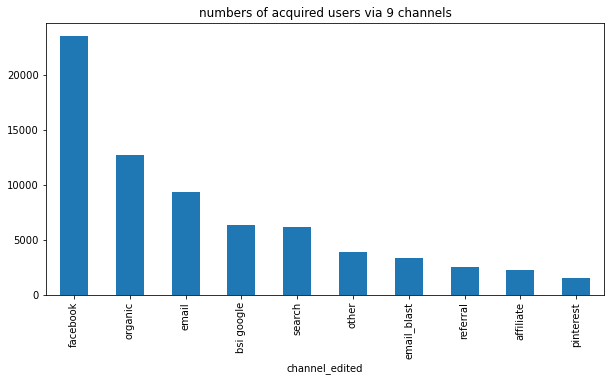

In [294]:
cust_sub_aa.groupby('channel_edited')['subid'].size().to_frame().sort_values(by='subid', ascending=False).plot(kind='bar', figsize=(10,5), title = 'numbers of acquired users via 9 channels', legend=False )

### Average CAC

In [295]:
a = cust_sub_aa.groupby('channel_edited')['subid'].size().to_frame()
a.sort_values(by='subid',ascending=False).T

channel_edited,facebook,organic,email,bsi google,search,other,email_blast,referral,affiliate,pinterest
subid,23528,12750,9335,6356,6194,3892,3388,2521,2257,1516


In [297]:
ad_spend

,date,facebook,email,search,bsi google,affiliate,email_blast,pinterest,referral,organic,other
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100,0,0
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600,0,0
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800,0,0
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400,0,0
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300,0,0
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300,0,0
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000,0,0
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400,0,0
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500,0,0
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000,0,0


In [299]:
ad_spend

,date,facebook,email,search,bsi google,affiliate,email_blast,pinterest,referral,organic,other
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100,0,0
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600,0,0
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800,0,0
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400,0,0
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300,0,0
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300,0,0
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000,0,0
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400,0,0
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500,0,0
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000,0,0


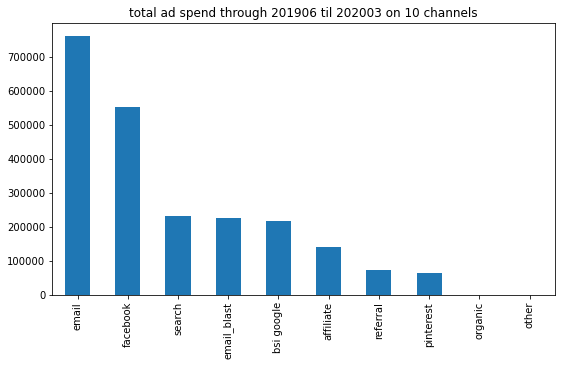

In [306]:
ad_spend.sum().to_frame().sort_values(by=0, ascending = False).plot(kind='bar', figsize =(9,5), title = 'total ad spend through 201906 til 202003 on 10 channels', legend=False)

In [307]:
b = ad_spend.sum().to_frame()
b

,0
facebook,552700
email,760600
search,232500
bsi google,216100
affiliate,139500
email_blast,226400
pinterest,63300
referral,73400
organic,0
other,0


In [308]:
avg_cac = pd.merge(a,b,left_index=True, right_index=True, how='inner')

In [309]:
avg_cac.columns = ['# of users','ad spend']
avg_cac['avg_cac'] = avg_cac['ad spend'] / avg_cac['# of users']

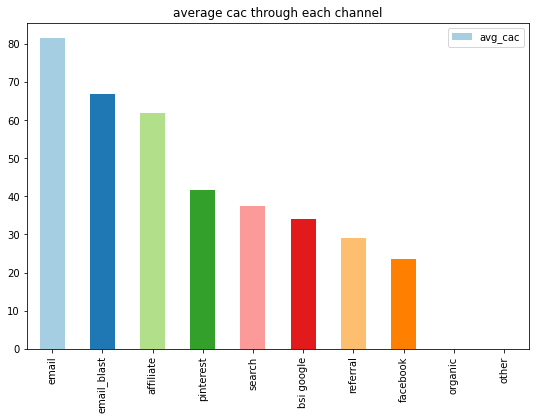

In [310]:
avg_cac.sort_values(by='avg_cac', ascending = False)[['avg_cac']].plot(kind = 'bar', figsize =(9,6), title = 'average cac through each channel',color=[plt.cm.Paired(np.arange(len(avg_cac)))] )

### Marginal CAC

In [323]:
ad_spend

,facebook,email,search,bsi google,affiliate,email_blast,pinterest,referral,organic,other
date,,,,,,,,,,
2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100,0,0
2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600,0,0
2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800,0,0
2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400,0,0
2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300,0,0
2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300,0,0
2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000,0,0
2020-01-31,49000,75500,33600,22700,14300,300,6700,7400,0,0
2020-02-29,49700,76600,30100,21700,15000,300,6400,6500,0,0


In [313]:
# cust_sub_aa = cust_sub_aa.drop(['account_creation_date_x'], axis=1)

In [330]:
cust_sub_aa['account_creation_date_y'] = cust_sub_aa['account_creation_date_y'].dt.strftime('%Y-%m')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [327]:
cust_sub_aa['channel_edited'].unique()

array(['other', 'email', 'facebook', 'organic', 'bsi google', 'search',
       'referral', 'email_blast', 'affiliate', 'pinterest'], dtype=object)

In [333]:
marg_cac = cust_sub_aa.groupby(['channel_edited','account_creation_date_y']).size().to_frame().reset_index()

In [336]:
marg_cac['channel_edited'].unique()

array(['affiliate', 'bsi google', 'email', 'email_blast', 'facebook',
       'organic', 'other', 'pinterest', 'referral', 'search'],
      dtype=object)

In [334]:
marg_cac.to_csv('mag_cac.csv')

In [339]:
pd.read_csv('marginal_cac.csv', index_col=0)

,affiliate,bsi google,email,email_blast,facebook,pinterest,referral,search,organic,other
Jun-19,185.94,151.77,339.37,111.70,122.19,368.75,225.93,384.44,0.0,0.0
Jul-19,23.35,18.83,32.96,23.99,12.67,19.61,15.71,28.98,0.0,0.0
Aug-19,55.63,30.74,68.99,215.36,19.73,36.47,28.22,31.87,0.0,0.0
Sep-19,47.81,32.97,86.53,90.76,26.43,39.74,23.49,35.20,0.0,0.0
Oct-19,135.56,38.49,103.97,80.75,23.75,52.76,32.59,37.84,0.0,0.0
Nov-19,102.63,20.45,61.91,25.13,11.75,29.58,18.62,23.16,0.0,0.0
Dec-19,113.08,37.56,103.12,41.18,26.48,54.55,34.63,44.46,0.0,0.0
Jan-20,122.22,55.10,186.88,23.08,62.50,62.62,43.02,67.07,0.0,0.0
Feb-20,58.59,34.83,100.52,12.00,25.94,38.10,28.38,31.82,0.0,0.0
Mar-20,49.03,41.81,79.59,14.29,24.33,46.83,37.04,28.41,0.0,0.0


# Churn Modelling

### Engamenet Preprocessing

In [582]:
eng = eng.reset_index(drop=True)

In [583]:
eng.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period'],
      dtype='object')

In [370]:
eng.isnull().sum()

subid                                  0
date                                   0
app_opens                          34611
cust_service_mssgs                 34611
num_videos_completed               34611
num_videos_more_than_30_seconds    34611
num_videos_rated                   34611
num_series_started                 34611
payment_period                         0
dtype: int64

In [371]:
eng = eng.dropna().reset_index(drop=True)

In [374]:
eng[ eng['subid'] == 20000062]

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1442720,20000062,2019-06-30,1.0,0.0,2.0,7.0,0.0,0.0,0.0
1442721,20000062,2019-07-01,1.0,1.0,4.0,6.0,0.0,1.0,0.0
1442722,20000062,2019-07-02,1.0,2.0,0.0,5.0,0.0,0.0,0.0
1442723,20000062,2019-07-04,1.0,0.0,0.0,5.0,0.0,0.0,0.0


In [387]:
eng.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period'],
      dtype='object')

In [389]:
eng_pre = eng.groupby(['subid','payment_period'])[['app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started']].sum().reset_index()

In [390]:
eng_pre

,subid,payment_period,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
0,20000062,0.0,4.0,3.0,6.0,23.0,0.0,1.0
1,20000405,0.0,5.0,4.0,13.0,17.0,0.0,1.0
2,20000604,0.0,13.0,4.0,8.0,64.0,0.0,1.0
3,20000604,1.0,1.0,1.0,0.0,4.0,0.0,0.0
4,20000685,0.0,17.0,4.0,11.0,63.0,0.0,7.0
...,...,...,...,...,...,...,...,...
200838,29999889,0.0,44.0,14.0,74.0,74.0,0.0,15.0
200839,29999889,1.0,130.0,15.0,132.0,132.0,20.0,23.0
200840,29999889,2.0,71.0,16.0,120.0,120.0,20.0,30.0
200841,29999945,0.0,13.0,2.0,63.0,72.0,0.0,11.0


In [391]:
eng_pre.columns

Index(['subid', 'payment_period', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started'],
      dtype='object')

In [392]:
eng_pre_0 = eng_pre[ eng_pre['payment_period'] == 0]
eng_pre_0.columns = ['subid',
'payment_period',
'period_0_app_opens',
'period_0_cust_service_mssgs',
'period_0_num_videos_completed',
'period_0_num_videos_more_than_30_seconds',
'period_0_num_videos_rated',
'period_0_num_series_started']

In [395]:
eng_pre_x0 = eng_pre[ eng_pre['payment_period'] != 0]

In [399]:
eng_pre_x0.columns

Index(['subid', 'payment_period', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started'],
      dtype='object')

In [401]:
eng_pre_x0_drft = eng_pre_x0.groupby(['subid'])[['payment_period', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started']].agg({'payment_period':'count',
'app_opens':'sum',
'cust_service_mssgs':'sum',
'num_videos_completed':'sum',
'num_videos_more_than_30_seconds':'sum',
'num_videos_rated':'sum',
'num_series_started':'sum'})
eng_pre_x0_drft

,payment_period,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
subid,,,,,,,
20000604,1,1.0,1.0,0.0,4.0,0.0,0.0
20000685,1,29.0,6.0,3.0,102.0,0.0,1.0
20000796,1,144.0,10.0,127.0,131.0,2.0,28.0
20000809,1,6.0,1.0,0.0,4.0,0.0,0.0
20001112,1,11.0,1.0,1.0,77.0,0.0,13.0
...,...,...,...,...,...,...,...
29999052,1,2.0,1.0,0.0,15.0,0.0,0.0
29999206,1,176.0,7.0,132.0,132.0,1.0,31.0
29999590,1,50.0,2.0,11.0,87.0,0.0,14.0


In [402]:
eng_pre_x0_drft.columns


Index(['payment_period', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started'],
      dtype='object')

In [406]:
eng_pre_x0_drft['avg_app_opens'] = eng_pre_x0_drft['app_opens'] / eng_pre_x0_drft['payment_period']
eng_pre_x0_drft['avg_cust_service_mssgs'] = eng_pre_x0_drft['cust_service_mssgs'] / eng_pre_x0_drft['payment_period']
eng_pre_x0_drft['avg_num_videos_completed'] = eng_pre_x0_drft['num_videos_completed'] / eng_pre_x0_drft['payment_period']
eng_pre_x0_drft['avg_num_videos_more_than_30_seconds'] = eng_pre_x0_drft['num_videos_more_than_30_seconds'] / eng_pre_x0_drft['payment_period']
eng_pre_x0_drft['avg_num_videos_rated'] = eng_pre_x0_drft['num_videos_rated'] / eng_pre_x0_drft['payment_period']
eng_pre_x0_drft['avg_num_series_started'] = eng_pre_x0_drft['num_series_started'] / eng_pre_x0_drft['payment_period']

In [408]:
eng_pre_x0_drft.columns

Index(['payment_period', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'avg_app_opens',
       'avg_cust_service_mssgs', 'avg_num_videos_completed',
       'avg_num_videos_more_than_30_seconds', 'avg_num_videos_rated',
       'avg_num_series_started'],
      dtype='object')

In [437]:
eng_pre_0 = eng_pre_0.drop(['payment_period'], axis =1)
eng_pre_0

,subid,period_0_app_opens,period_0_cust_service_mssgs,period_0_num_videos_completed,period_0_num_videos_more_than_30_seconds,period_0_num_videos_rated,period_0_num_series_started
0,20000062,4.0,3.0,6.0,23.0,0.0,1.0
1,20000405,5.0,4.0,13.0,17.0,0.0,1.0
2,20000604,13.0,4.0,8.0,64.0,0.0,1.0
4,20000685,17.0,4.0,11.0,63.0,0.0,7.0
6,20000741,1.0,1.0,2.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...
200835,29999740,15.0,3.0,11.0,31.0,0.0,0.0
200836,29999820,12.0,6.0,22.0,50.0,0.0,7.0
200837,29999822,5.0,4.0,2.0,25.0,0.0,1.0
200838,29999889,44.0,14.0,74.0,74.0,0.0,15.0


In [410]:
eng_pre_x0_drft = eng_pre_x0_drft.drop(['payment_period', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started'], axis=1)
eng_pre_x0_drft

,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_num_videos_more_than_30_seconds,avg_num_videos_rated,avg_num_series_started
subid,,,,,,
20000604,1.0,1.0,0.0,4.0,0.0,0.0
20000685,29.0,6.0,3.0,102.0,0.0,1.0
20000796,144.0,10.0,127.0,131.0,2.0,28.0
20000809,6.0,1.0,0.0,4.0,0.0,0.0
20001112,11.0,1.0,1.0,77.0,0.0,13.0
...,...,...,...,...,...,...
29999052,2.0,1.0,0.0,15.0,0.0,0.0
29999206,176.0,7.0,132.0,132.0,1.0,31.0
29999590,50.0,2.0,11.0,87.0,0.0,14.0


In [438]:
eng_all = pd.merge(eng_pre_0, eng_pre_x0_drft, right_on='subid',left_index=True, how='outer')

In [439]:
eng_all.drop_duplicates(subset='subid',keep='first',inplace=True)

In [440]:
eng_all = eng_all.reset_index(drop=True)

In [570]:
eng_all = eng_all.fillna(0)

In [584]:
eng_all

,subid,period_0_app_opens,period_0_cust_service_mssgs,period_0_num_videos_completed,period_0_num_videos_more_than_30_seconds,period_0_num_videos_rated,period_0_num_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_num_videos_more_than_30_seconds,avg_num_videos_rated,avg_num_series_started
0,20000062,4.0,3.0,6.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20000405,5.0,4.0,13.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20000604,13.0,4.0,8.0,64.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20000685,17.0,4.0,11.0,63.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20000741,1.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135014,27066598,0.0,0.0,0.0,0.0,0.0,0.0,17.5,1.0,22.5,72.5,0.5,8.0
135015,27542549,0.0,0.0,0.0,0.0,0.0,0.0,51.5,3.5,119.5,127.0,7.0,26.5
135016,27791277,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1.0,5.0,25.0,0.0,1.0
135017,28214657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### cust_sub preprocessing

In [593]:
cust_sub['age'].value_counts().to_frame().reset_index().sort_values(by='index', ascending=False)

,index,age
186,8061990.0,1
176,7081956.0,1
146,1952250.0,1
178,691949.0,1
160,651953.0,1
...,...,...
51,21.0,984
52,20.0,934
57,19.0,449
53,18.0,824


In [594]:
cust_sub['language'].unique()

array(['ar'], dtype=object)

In [595]:
cust_sub = cust_sub[np.logical_and( cust_sub['age']  <= 100, cust_sub['age']  != 0) ]

In [596]:
cust_sub.isnull().sum()

subid                                0
package_type                     43768
num_weekly_services_utilized     36744
preferred_genre                  44155
intended_use                      3214
weekly_consumption_hour           2174
num_ideal_streaming_services     38716
retarget_TF                          0
age                                  0
male_TF                              0
country                              0
attribution_technical                0
attribution_survey                2566
op_sys                               6
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date_x              0
creation_until_cancel_days       68138
cancel_before_trial_end              0
trial_end_date                       0
initial_credit_card_declined         0
revenue_net                          0
join_fee                             0
language                 

In [597]:
#cust_sub['weekly_consumption_hour'] = 
cust_sub['weekly_consumption_hour'].fillna((cust_sub['weekly_consumption_hour'].mean()), inplace=True)

In [599]:
cust_sub['weekly_consumption_hour'].isnull().sum()

0

In [600]:
cust_sub.isnull().sum()

subid                                0
package_type                     43768
num_weekly_services_utilized     36744
preferred_genre                  44155
intended_use                      3214
weekly_consumption_hour              0
num_ideal_streaming_services     38716
retarget_TF                          0
age                                  0
male_TF                              0
country                              0
attribution_technical                0
attribution_survey                2566
op_sys                               6
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date_x              0
creation_until_cancel_days       68138
cancel_before_trial_end              0
trial_end_date                       0
initial_credit_card_declined         0
revenue_net                          0
join_fee                             0
language                 

In [507]:
#cust_sub = cust_sub.dropna(subset = ['package_type','num_weekly_services_utilized','preferred_genre','num_ideal_streaming_services','payment_type'])

In [608]:
trial = pd.merge(eng_all, cust_sub, left_on='subid',right_on='subid',how='inner')
trial

,subid,period_0_app_opens,period_0_cust_service_mssgs,period_0_num_videos_completed,period_0_num_videos_more_than_30_seconds,period_0_num_videos_rated,period_0_num_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_num_videos_more_than_30_seconds,avg_num_videos_rated,avg_num_series_started,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_x,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,customer_service_rep_id,user_id,current_sub_TF,cancel_date,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,20000685,17.0,4.0,11.0,63.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,base,2.817946,comedy,other,25.851492,1.873939,True,67.0,False,UAE,referral,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 05:55:37,NaN,True,2020-03-18,False,3.6700,0.3303,ar,True,False,Standard Charter,35600079,20000685,True,NaT,2020-03-03 05:55:37,14,True,OTT,3.6700,0,2020-03-03 07:43:33,2020-03-18 14:33:41,True
1,20000796,78.0,28.0,67.0,72.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,enhanced,2.377153,regional,replace OTT,22.951579,1.842170,False,34.0,False,UAE,facebook,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-26 02:15:40,NaN,True,2019-10-11,False,4.5875,0.0367,ar,True,False,RAKBANK,34899988,20000796,False,NaT,2019-09-26 02:15:40,14,True,OTT,4.5875,0,2019-09-26 05:59:06,2019-10-10 13:35:38,True
2,20000809,1.0,1.0,2.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.437959,NaN,expand regional access,22.951579,1.901712,False,41.0,False,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-13 20:40:21,NaN,True,2019-07-28,False,14.2029,0.0367,ar,True,False,CBD,32031225,20000809,True,NaT,2019-07-13 20:40:21,14,True,OTT,4.7343,0,2019-07-13 22:29:25,2019-07-28 18:45:34,True
3,20001132,15.0,5.0,57.0,74.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,base,4.320220,drama,other,28.751405,2.342617,False,66.0,False,UAE,pinterest,pinterest,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-21 23:25:54,NaN,True,2020-03-07,False,4.5875,0.3303,ar,True,False,RAKBANK,33842641,20001132,True,NaT,2020-02-21 23:25:54,14,True,OTT,4.5875,0,2020-02-22 06:36:49,2020-03-15 14:17:43,True
4,20001231,9.0,1.0,4.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,base,NaN,drama,other,33.101274,NaN,False,67.0,False,UAE,facebook,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-29 18:00:27,NaN,True,2019-11-13,False,9.1750,0.0367,ar,True,False,Paypal,36873382,20001231,True,NaT,2019-10-29 18:00:27,14,True,OTT,4.5875,0,2019-10-29 19:08:02,2019-11-13 10:05:20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39628,26987319,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,43.0,47.0,0.0,2.0,NaN,3.572028,NaN,NaN,30.201361,2.174868,False,36.0,False,UAE,playstore,NaN,Android,4,base_uae_no_trial_7_day_guarantee,4.7343,4.4407,2020-03-14 06:16:13,NaN,True,2020-03-14,False,4.5875,0.3303,ar,True,False,Paypal,31591685,26987319,True,NaT,2020-03-14 06:16:13,0,True,OTT,4.5875,0,2020-03-14 07:05:25,NaT,False
39629,27066598,0.0,0.0,0.0,0.0,0.0,0.0,17.5,1.0,22.5,72.5,0.5,8.0,NaN,2.555784,NaN,NaN,28.120166,NaN,True,58.0,False,UAE,organic,NaN,iOS,4,low_uae_no_trial,1.0643,1.0276,2019-07-25 02:37:23,NaN,True,2019-07-25,False,3.0828,0.0000,ar,True,False,Najim,35609040,27066598,True,NaT,2019-07-25 02:37:23,0,True,OTT,1.0276,0,2019-07-25 02:37:23,2019-07-26 14:39:16,True
39630,27542549,0.0,0.0,0.0,0.0,0.0,0.0,51.5,3.5,119.5,127.0,7.0,26.5,NaN,2.529273,NaN,NaN,28.120166,NaN,True,68.0,False,UAE,organ

In [618]:
# quit_user = list(cust_sub [ cust_sub['cancel_date'] < cust_sub['trial_end_date'] ]['subid'])
quit_user = set(list(trial [ trial['cancel_date'] < trial['trial_end_date'] ]['subid']))

In [619]:
trial[~trial['subid'].isin(quit_user)].reset_index(drop=True)

,subid,period_0_app_opens,period_0_cust_service_mssgs,period_0_num_videos_completed,period_0_num_videos_more_than_30_seconds,period_0_num_videos_rated,period_0_num_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_num_videos_more_than_30_seconds,avg_num_videos_rated,avg_num_series_started,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_x,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,customer_service_rep_id,user_id,current_sub_TF,cancel_date,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,20000685,17.0,4.0,11.0,63.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,base,2.817946,comedy,other,25.851492,1.873939,True,67.0,False,UAE,referral,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 05:55:37,NaN,True,2020-03-18,False,3.6700,0.3303,ar,True,False,Standard Charter,35600079,20000685,True,NaT,2020-03-03 05:55:37,14,True,OTT,3.6700,0,2020-03-03 07:43:33,2020-03-18 14:33:41,True
1,20000796,78.0,28.0,67.0,72.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,enhanced,2.377153,regional,replace OTT,22.951579,1.842170,False,34.0,False,UAE,facebook,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-26 02:15:40,NaN,True,2019-10-11,False,4.5875,0.0367,ar,True,False,RAKBANK,34899988,20000796,False,NaT,2019-09-26 02:15:40,14,True,OTT,4.5875,0,2019-09-26 05:59:06,2019-10-10 13:35:38,True
2,20000809,1.0,1.0,2.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.437959,NaN,expand regional access,22.951579,1.901712,False,41.0,False,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-13 20:40:21,NaN,True,2019-07-28,False,14.2029,0.0367,ar,True,False,CBD,32031225,20000809,True,NaT,2019-07-13 20:40:21,14,True,OTT,4.7343,0,2019-07-13 22:29:25,2019-07-28 18:45:34,True
3,20001132,15.0,5.0,57.0,74.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,base,4.320220,drama,other,28.751405,2.342617,False,66.0,False,UAE,pinterest,pinterest,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-21 23:25:54,NaN,True,2020-03-07,False,4.5875,0.3303,ar,True,False,RAKBANK,33842641,20001132,True,NaT,2020-02-21 23:25:54,14,True,OTT,4.5875,0,2020-02-22 06:36:49,2020-03-15 14:17:43,True
4,20001231,9.0,1.0,4.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,base,NaN,drama,other,33.101274,NaN,False,67.0,False,UAE,facebook,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-29 18:00:27,NaN,True,2019-11-13,False,9.1750,0.0367,ar,True,False,Paypal,36873382,20001231,True,NaT,2019-10-29 18:00:27,14,True,OTT,4.5875,0,2019-10-29 19:08:02,2019-11-13 10:05:20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39628,26987319,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,43.0,47.0,0.0,2.0,NaN,3.572028,NaN,NaN,30.201361,2.174868,False,36.0,False,UAE,playstore,NaN,Android,4,base_uae_no_trial_7_day_guarantee,4.7343,4.4407,2020-03-14 06:16:13,NaN,True,2020-03-14,False,4.5875,0.3303,ar,True,False,Paypal,31591685,26987319,True,NaT,2020-03-14 06:16:13,0,True,OTT,4.5875,0,2020-03-14 07:05:25,NaT,False
39629,27066598,0.0,0.0,0.0,0.0,0.0,0.0,17.5,1.0,22.5,72.5,0.5,8.0,NaN,2.555784,NaN,NaN,28.120166,NaN,True,58.0,False,UAE,organic,NaN,iOS,4,low_uae_no_trial,1.0643,1.0276,2019-07-25 02:37:23,NaN,True,2019-07-25,False,3.0828,0.0000,ar,True,False,Najim,35609040,27066598,True,NaT,2019-07-25 02:37:23,0,True,OTT,1.0276,0,2019-07-25 02:37:23,2019-07-26 14:39:16,True
39630,27542549,0.0,0.0,0.0,0.0,0.0,0.0,51.5,3.5,119.5,127.0,7.0,26.5,NaN,2.529273,NaN,NaN,28.120166,NaN,True,68.0,False,UAE,organ

In [629]:
trial

,subid,period_0_app_opens,period_0_cust_service_mssgs,period_0_num_videos_completed,period_0_num_videos_more_than_30_seconds,period_0_num_videos_rated,period_0_num_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_num_videos_more_than_30_seconds,avg_num_videos_rated,avg_num_series_started,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_x,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,customer_service_rep_id,user_id,current_sub_TF,cancel_date,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,20000685,17.0,4.0,11.0,63.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,base,2.817946,comedy,other,25.851492,1.873939,True,67.0,False,UAE,referral,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 05:55:37,NaN,True,2020-03-18,False,3.6700,0.3303,ar,True,False,Standard Charter,35600079,20000685,True,NaT,2020-03-03 05:55:37,14,True,OTT,3.6700,0,2020-03-03 07:43:33,2020-03-18 14:33:41,True
1,20000796,78.0,28.0,67.0,72.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,enhanced,2.377153,regional,replace OTT,22.951579,1.842170,False,34.0,False,UAE,facebook,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-26 02:15:40,NaN,True,2019-10-11,False,4.5875,0.0367,ar,True,False,RAKBANK,34899988,20000796,False,NaT,2019-09-26 02:15:40,14,True,OTT,4.5875,0,2019-09-26 05:59:06,2019-10-10 13:35:38,True
2,20000809,1.0,1.0,2.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.437959,NaN,expand regional access,22.951579,1.901712,False,41.0,False,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-13 20:40:21,NaN,True,2019-07-28,False,14.2029,0.0367,ar,True,False,CBD,32031225,20000809,True,NaT,2019-07-13 20:40:21,14,True,OTT,4.7343,0,2019-07-13 22:29:25,2019-07-28 18:45:34,True
3,20001132,15.0,5.0,57.0,74.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,base,4.320220,drama,other,28.751405,2.342617,False,66.0,False,UAE,pinterest,pinterest,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-21 23:25:54,NaN,True,2020-03-07,False,4.5875,0.3303,ar,True,False,RAKBANK,33842641,20001132,True,NaT,2020-02-21 23:25:54,14,True,OTT,4.5875,0,2020-02-22 06:36:49,2020-03-15 14:17:43,True
4,20001231,9.0,1.0,4.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,base,NaN,drama,other,33.101274,NaN,False,67.0,False,UAE,facebook,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-29 18:00:27,NaN,True,2019-11-13,False,9.1750,0.0367,ar,True,False,Paypal,36873382,20001231,True,NaT,2019-10-29 18:00:27,14,True,OTT,4.5875,0,2019-10-29 19:08:02,2019-11-13 10:05:20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39628,26987319,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,43.0,47.0,0.0,2.0,NaN,3.572028,NaN,NaN,30.201361,2.174868,False,36.0,False,UAE,playstore,NaN,Android,4,base_uae_no_trial_7_day_guarantee,4.7343,4.4407,2020-03-14 06:16:13,NaN,True,2020-03-14,False,4.5875,0.3303,ar,True,False,Paypal,31591685,26987319,True,NaT,2020-03-14 06:16:13,0,True,OTT,4.5875,0,2020-03-14 07:05:25,NaT,False
39629,27066598,0.0,0.0,0.0,0.0,0.0,0.0,17.5,1.0,22.5,72.5,0.5,8.0,NaN,2.555784,NaN,NaN,28.120166,NaN,True,58.0,False,UAE,organic,NaN,iOS,4,low_uae_no_trial,1.0643,1.0276,2019-07-25 02:37:23,NaN,True,2019-07-25,False,3.0828,0.0000,ar,True,False,Najim,35609040,27066598,True,NaT,2019-07-25 02:37:23,0,True,OTT,1.0276,0,2019-07-25 02:37:23,2019-07-26 14:39:16,True
39630,27542549,0.0,0.0,0.0,0.0,0.0,0.0,51.5,3.5,119.5,127.0,7.0,26.5,NaN,2.529273,NaN,NaN,28.120166,NaN,True,68.0,False,UAE,organ

In [607]:
#
cust_sub.drop_duplicates(subset='subid',keep='first', inplace=True)
cust_sub

In [630]:
trial['how_long'] = (trial['next_payment'] - trial['last_payment']).dt.days
trial['how_long']

0        15.0
1        14.0
2        14.0
3        22.0
4        14.0
         ... 
39628     NaN
39629     1.0
39630     1.0
39631     2.0
39632    13.0
Name: how_long, Length: 39633, dtype: float64

In [631]:
trial.isnull().sum()

subid                                           0
period_0_app_opens                              0
period_0_cust_service_mssgs                     0
period_0_num_videos_completed                   0
period_0_num_videos_more_than_30_seconds        0
period_0_num_videos_rated                       0
period_0_num_series_started                     0
avg_app_opens                                   0
avg_cust_service_mssgs                          0
avg_num_videos_completed                        0
avg_num_videos_more_than_30_seconds             0
avg_num_videos_rated                            0
avg_num_series_started                          0
package_type                                12133
num_weekly_services_utilized                 6018
preferred_genre                             12261
intended_use                                 1029
weekly_consumption_hour                         0
num_ideal_streaming_services                 6677
retarget_TF                                     0


In [572]:
for_churn = pd.merge(eng_all,cust_sub,left_on='subid',right_on='subid',how='inner')

In [573]:
for_churn

,subid,period_0_app_opens,period_0_cust_service_mssgs,period_0_num_videos_completed,period_0_num_videos_more_than_30_seconds,period_0_num_videos_rated,period_0_num_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_num_videos_more_than_30_seconds,avg_num_videos_rated,avg_num_series_started,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_x,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,customer_service_rep_id,user_id,current_sub_TF,cancel_date,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,how_long
0,20000685,17.0,4.0,11.0,63.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,base,2.817946,comedy,other,None,1.873939,True,67.0,False,UAE,referral,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 05:55:37,NaN,True,2020-03-18,False,3.6700,0.3303,ar,True,False,Standard Charter,35600079,20000685,True,NaT,2020-03-03 05:55:37,14,True,OTT,3.6700,0,2020-03-03 07:43:33,2020-03-18 14:33:41,True,15.0
1,20000796,78.0,28.0,67.0,72.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,enhanced,2.377153,regional,replace OTT,None,1.842170,False,34.0,False,UAE,facebook,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-26 02:15:40,NaN,True,2019-10-11,False,4.5875,0.0367,ar,True,False,RAKBANK,34899988,20000796,False,NaT,2019-09-26 02:15:40,14,True,OTT,4.5875,0,2019-09-26 05:59:06,2019-10-10 13:35:38,True,14.0
2,20000809,1.0,1.0,2.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.437959,NaN,expand regional access,None,1.901712,False,41.0,False,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-13 20:40:21,NaN,True,2019-07-28,False,14.2029,0.0367,ar,True,False,CBD,32031225,20000809,True,NaT,2019-07-13 20:40:21,14,True,OTT,4.7343,0,2019-07-13 22:29:25,2019-07-28 18:45:34,True,14.0
3,20001132,15.0,5.0,57.0,74.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,base,4.320220,drama,other,None,2.342617,False,66.0,False,UAE,pinterest,pinterest,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-21 23:25:54,NaN,True,2020-03-07,False,4.5875,0.3303,ar,True,False,RAKBANK,33842641,20001132,True,NaT,2020-02-21 23:25:54,14,True,OTT,4.5875,0,2020-02-22 06:36:49,2020-03-15 14:17:43,True,22.0
4,20001231,9.0,1.0,4.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,base,NaN,drama,other,None,NaN,False,67.0,False,UAE,facebook,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-29 18:00:27,NaN,True,2019-11-13,False,9.1750,0.0367,ar,True,False,Paypal,36873382,20001231,True,NaT,2019-10-29 18:00:27,14,True,OTT,4.5875,0,2019-10-29 19:08:02,2019-11-13 10:05:20,True,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39628,26987319,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,43.0,47.0,0.0,2.0,NaN,3.572028,NaN,NaN,None,2.174868,False,36.0,False,UAE,playstore,NaN,Android,4,base_uae_no_trial_7_day_guarantee,4.7343,4.4407,2020-03-14 06:16:13,NaN,True,2020-03-14,False,4.5875,0.3303,ar,True,False,Paypal,31591685,26987319,True,NaT,2020-03-14 06:16:13,0,True,OTT,4.5875,0,2020-03-14 07:05:25,NaT,False,NaN
39629,27066598,0.0,0.0,0.0,0.0,0.0,0.0,17.5,1.0,22.5,72.5,0.5,8.0,NaN,2.555784,NaN,NaN,None,NaN,True,58.0,False,UAE,organic,NaN,iOS,4,low_uae_no_trial,1.0643,1.0276,2019-07-25 02:37:23,NaN,True,2019-07-25,False,3.0828,0.0000,ar,True,False,Najim,35609040,27066598,True,NaT,2019-07-25 02:37:23,0,True,OTT,1.0276,0,2019-07-25 02:37:23,2019-07-26 14:39:16,True,1.0
39630,27542549,0.0,0.0,0.0,0.0,0.0,0.0,51.5,3.5,119.5,127.0,7.0,26.5,NaN,2.529273,NaN,NaN,None,NaN,True,68.0,False,UAE

In [552]:
for_churn['intended_use'].unique()

array(['access to exclusive content', 'replace OTT',
       'expand international access', 'supplement OTT', nan,
       'expand regional access', 'education', 'other'], dtype=object)

In [554]:
for_churn['current_sub_TF'].unique()

array([ True, False])

In [632]:
def churn(frame):
    if frame == True:
        return(0)
    else:
        return(1)

In [633]:
trial['churn_status'] = trial['current_sub_TF'].apply(churn)

In [634]:
trial

,subid,period_0_app_opens,period_0_cust_service_mssgs,period_0_num_videos_completed,period_0_num_videos_more_than_30_seconds,period_0_num_videos_rated,period_0_num_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_num_videos_more_than_30_seconds,avg_num_videos_rated,avg_num_series_started,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date_x,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type,customer_service_rep_id,user_id,current_sub_TF,cancel_date,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,how_long,churn_status
0,20000685,17.0,4.0,11.0,63.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,base,2.817946,comedy,other,25.851492,1.873939,True,67.0,False,UAE,referral,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-03 05:55:37,NaN,True,2020-03-18,False,3.6700,0.3303,ar,True,False,Standard Charter,35600079,20000685,True,NaT,2020-03-03 05:55:37,14,True,OTT,3.6700,0,2020-03-03 07:43:33,2020-03-18 14:33:41,True,15.0,0
1,20000796,78.0,28.0,67.0,72.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,enhanced,2.377153,regional,replace OTT,22.951579,1.842170,False,34.0,False,UAE,facebook,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-09-26 02:15:40,NaN,True,2019-10-11,False,4.5875,0.0367,ar,True,False,RAKBANK,34899988,20000796,False,NaT,2019-09-26 02:15:40,14,True,OTT,4.5875,0,2019-09-26 05:59:06,2019-10-10 13:35:38,True,14.0,1
2,20000809,1.0,1.0,2.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.437959,NaN,expand regional access,22.951579,1.901712,False,41.0,False,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-07-13 20:40:21,NaN,True,2019-07-28,False,14.2029,0.0367,ar,True,False,CBD,32031225,20000809,True,NaT,2019-07-13 20:40:21,14,True,OTT,4.7343,0,2019-07-13 22:29:25,2019-07-28 18:45:34,True,14.0,0
3,20001132,15.0,5.0,57.0,74.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,base,4.320220,drama,other,28.751405,2.342617,False,66.0,False,UAE,pinterest,pinterest,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-02-21 23:25:54,NaN,True,2020-03-07,False,4.5875,0.3303,ar,True,False,RAKBANK,33842641,20001132,True,NaT,2020-02-21 23:25:54,14,True,OTT,4.5875,0,2020-02-22 06:36:49,2020-03-15 14:17:43,True,22.0,0
4,20001231,9.0,1.0,4.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,base,NaN,drama,other,33.101274,NaN,False,67.0,False,UAE,facebook,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-29 18:00:27,NaN,True,2019-11-13,False,9.1750,0.0367,ar,True,False,Paypal,36873382,20001231,True,NaT,2019-10-29 18:00:27,14,True,OTT,4.5875,0,2019-10-29 19:08:02,2019-11-13 10:05:20,True,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39628,26987319,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,43.0,47.0,0.0,2.0,NaN,3.572028,NaN,NaN,30.201361,2.174868,False,36.0,False,UAE,playstore,NaN,Android,4,base_uae_no_trial_7_day_guarantee,4.7343,4.4407,2020-03-14 06:16:13,NaN,True,2020-03-14,False,4.5875,0.3303,ar,True,False,Paypal,31591685,26987319,True,NaT,2020-03-14 06:16:13,0,True,OTT,4.5875,0,2020-03-14 07:05:25,NaT,False,NaN,0
39629,27066598,0.0,0.0,0.0,0.0,0.0,0.0,17.5,1.0,22.5,72.5,0.5,8.0,NaN,2.555784,NaN,NaN,28.120166,NaN,True,58.0,False,UAE,organic,NaN,iOS,4,low_uae_no_trial,1.0643,1.0276,2019-07-25 02:37:23,NaN,True,2019-07-25,False,3.0828,0.0000,ar,True,False,Najim,35609040,27066598,True,NaT,2019-07-25 02:37:23,0,True,OTT,1.0276,0,2019-07-25 02:37:23,2019-07-26 14:39:16,True,1.0,0
39630,27542549,0.0,0.0,0.0,0.0,0.0,0.0,51.5,3.5,119.

In [636]:
trial.isnull().sum()

subid                                           0
period_0_app_opens                              0
period_0_cust_service_mssgs                     0
period_0_num_videos_completed                   0
period_0_num_videos_more_than_30_seconds        0
period_0_num_videos_rated                       0
period_0_num_series_started                     0
avg_app_opens                                   0
avg_cust_service_mssgs                          0
avg_num_videos_completed                        0
avg_num_videos_more_than_30_seconds             0
avg_num_videos_rated                            0
avg_num_series_started                          0
package_type                                12133
num_weekly_services_utilized                 6018
preferred_genre                             12261
intended_use                                 1029
weekly_consumption_hour                         0
num_ideal_streaming_services                 6677
retarget_TF                                     0


In [640]:
trial.columns

Index(['subid', 'period_0_app_opens', 'period_0_cust_service_mssgs',
       'period_0_num_videos_completed',
       'period_0_num_videos_more_than_30_seconds', 'period_0_num_videos_rated',
       'period_0_num_series_started', 'avg_app_opens',
       'avg_cust_service_mssgs', 'avg_num_videos_completed',
       'avg_num_videos_more_than_30_seconds', 'avg_num_videos_rated',
       'avg_num_series_started', 'package_type',
       'num_weekly_services_utilized', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'num_ideal_streaming_services',
       'retarget_TF', 'age', 'male_TF', 'country', 'attribution_technical',
       'attribution_survey', 'op_sys', 'months_per_bill_period', 'plan_type',
       'monthly_price', 'discount_price', 'account_creation_date_x',
       'creation_until_cancel_days', 'cancel_before_trial_end',
       'trial_end_date', 'initial_credit_card_declined', 'revenue_net',
       'join_fee', 'language', 'paid_TF', 'refund_after_trial_TF',
       'pa

In [644]:
X = trial[[ 'subid', 'period_0_app_opens', 'period_0_cust_service_mssgs',
       'period_0_num_videos_completed',
       'period_0_num_videos_more_than_30_seconds', 'period_0_num_videos_rated',
       'period_0_num_series_started', 'avg_app_opens',
       'avg_cust_service_mssgs', 'avg_num_videos_completed',
       'avg_num_videos_more_than_30_seconds', 'avg_num_videos_rated',
       'avg_num_series_started','intended_use', 'weekly_consumption_hour','num_trial_days','initial_credit_card_declined','churn_status']]

In [651]:
X = X.dropna().reset_index(drop=True)

In [652]:
X.isnull().sum()

subid                                       0
period_0_app_opens                          0
period_0_cust_service_mssgs                 0
period_0_num_videos_completed               0
period_0_num_videos_more_than_30_seconds    0
period_0_num_videos_rated                   0
period_0_num_series_started                 0
avg_app_opens                               0
avg_cust_service_mssgs                      0
avg_num_videos_completed                    0
avg_num_videos_more_than_30_seconds         0
avg_num_videos_rated                        0
avg_num_series_started                      0
intended_use                                0
weekly_consumption_hour                     0
num_trial_days                              0
initial_credit_card_declined                0
churn_status                                0
dtype: int64

In [655]:
X = pd.get_dummies(X,columns=['intended_use','num_trial_days','initial_credit_card_declined'],drop_first=True)

In [656]:
X

,subid,period_0_app_opens,period_0_cust_service_mssgs,period_0_num_videos_completed,period_0_num_videos_more_than_30_seconds,period_0_num_videos_rated,period_0_num_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_num_videos_more_than_30_seconds,avg_num_videos_rated,avg_num_series_started,weekly_consumption_hour,churn_status,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,initial_credit_card_declined_True
0,20000685,17.0,4.0,11.0,63.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,25.851492,0,0,0,0,1,0,0,0
1,20000796,78.0,28.0,67.0,72.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,22.951579,1,0,0,0,0,1,0,0
2,20000809,1.0,1.0,2.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.951579,0,0,0,1,0,0,0,0
3,20001132,15.0,5.0,57.0,74.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,28.751405,0,0,0,0,1,0,0,0
4,20001231,9.0,1.0,4.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.101274,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38599,29998441,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.201361,0,0,0,0,0,1,0,0
38600,29998629,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.351055,0,0,0,0,0,0,0,0
38601,29998731,12.0,5.0,60.0,74.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.101274,0,0,0,1,0,0,0,0
38602,29998835,47.0,4.0,74.0,74.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,21.501623,1,0,0,0,0,0,0,0


In [657]:
# Data preprocessing module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#np.set_printoptions(precision=2)

np.set_printoptions(precision=4)

In [662]:
y = X[['churn_status']]
x = X.copy().drop(['churn_status','subid'], axis=1)

In [664]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

# scale
scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [665]:
# Logistic Regression: 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# instantiate the model ( using the default parameters)
logreg = LogisticRegression().fit(x_train_scale, y_train)
penalty = ['l1', 'l2']
C = np.logspace(-1, 4, 10) 
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(x, y)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 774.2636826811278


In [669]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
C_opt = 774.26 # the optimal parameter C
logreg = LogisticRegression(penalty='l2',C=C_opt).fit(x_train_scale, y_train)

print("Training accuracy",logreg.score(x_train_scale,y_train))
# use test data to see the prediction
y_pred = logreg.predict(x_test_scale).astype('int64')
result = pd.DataFrame()
y_pred_prob = logreg.predict_proba(x_test_scale)
result['log_01'] = y_pred
result['log_prob'] = y_pred_prob[:,1]
result.head(5)

y_test = y_test.astype('int64')
print("Test Accuracy",metrics.accuracy_score(y_test,y_pred))
print("Test Precision",metrics.precision_score(y_test,y_pred))
print("Test Recall",metrics.recall_score(y_test,y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Training accuracy 0.7197996718763492
Test Accuracy 0.7089107628545526
Test Precision 0.81843233312921
Test Recall 0.6176776429809359


array([[5601, 1186],
       [3309, 5346]], dtype=int64)

In [670]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71      6787
           1       0.82      0.62      0.70      8655

    accuracy                           0.71     15442
   macro avg       0.72      0.72      0.71     15442
weighted avg       0.74      0.71      0.71     15442



Text(0.5, 15.0, 'Predicted label')

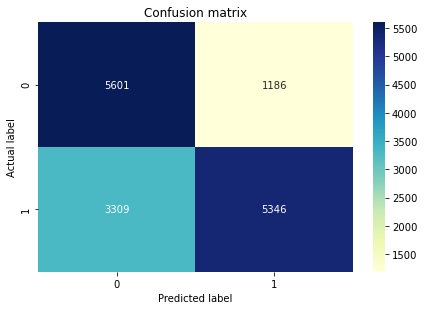

In [671]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [676]:
from sklearn.ensemble import GradientBoostingClassifier
param_test = {'max_features':range(2, 10 ,1),
                'n_estimators': range(100, 150, 10),
                'max_depth':  range(2, 5, 1)
}

estimator = GradientBoostingClassifier()
gsearch = GridSearchCV(estimator , param_grid = param_test, cv=5)
gsearch.fit(x_train_scale, y_train)
gsearch.best_params_, gsearch.best_score_
print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))


best score is: 0.7207063293325274
best params are: {'max_depth': 2, 'max_features': 9, 'n_estimators': 140}


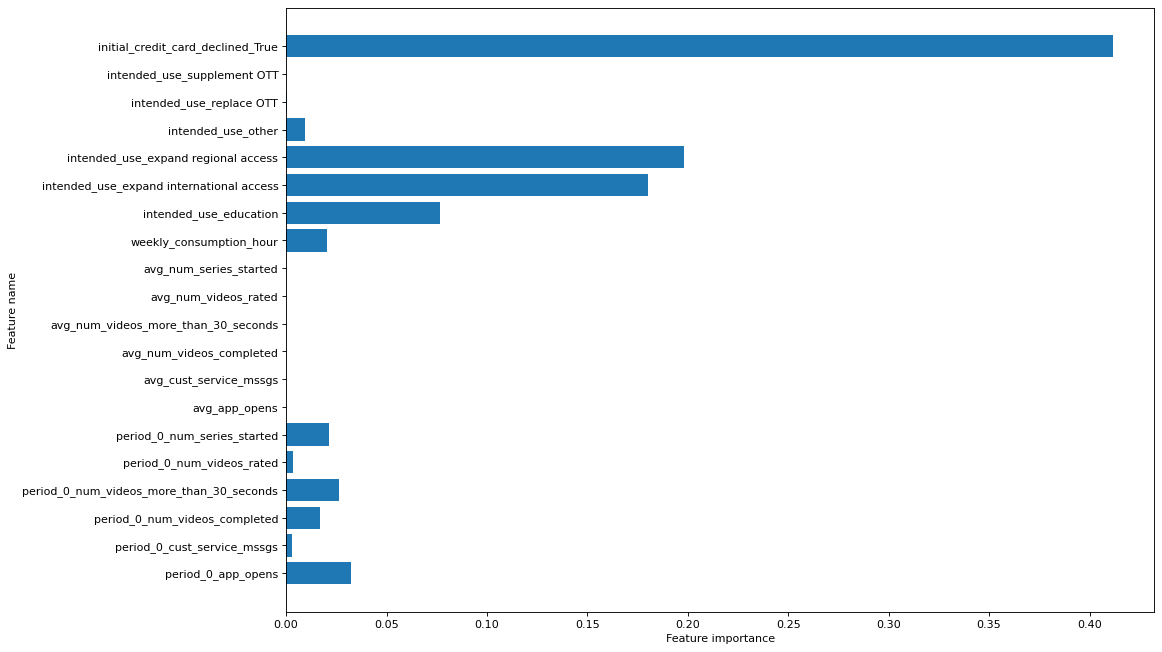

Feature importances: [3.2469e-02 2.8392e-03 1.6960e-02 2.6099e-02 3.5918e-03 2.1148e-02
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 2.0322e-02 7.6622e-02 1.7995e-01 1.9820e-01 9.5531e-03 5.5843e-04
 1.6440e-04 4.1153e-01]


In [680]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

clf = GradientBoostingClassifier(max_depth = 2,max_features=9, n_estimators = 140)
clf_best = clf.fit(x_train_scale, y_train)
plt.figure(figsize=(14,10), dpi=80)
plot_feature_importances(clf_best, x_train.columns)
plt.show()

print('Feature importances: {}'.format(clf_best.feature_importances_))

In [686]:
x_test

,period_0_app_opens,period_0_cust_service_mssgs,period_0_num_videos_completed,period_0_num_videos_more_than_30_seconds,period_0_num_videos_rated,period_0_num_series_started,avg_app_opens,avg_cust_service_mssgs,avg_num_videos_completed,avg_num_videos_more_than_30_seconds,avg_num_videos_rated,avg_num_series_started,weekly_consumption_hour,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,initial_credit_card_declined_True
32331,43.0,5.0,63.0,74.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.101274,0,0,0,0,1,0,0
8676,41.0,5.0,69.0,73.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,36.001186,0,0,0,0,1,0,0
4983,3.0,2.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.301448,0,0,0,0,1,0,1
2710,15.0,2.0,19.0,33.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,27.301448,0,0,1,0,0,0,0
5271,44.0,4.0,63.0,74.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,14.251842,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30942,65.0,2.0,74.0,74.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,31.651317,0,0,0,0,0,1,0
3304,16.0,5.0,72.0,72.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,25.851492,0,0,0,0,0,0,0
11765,12.0,9.0,20.0,66.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,44.700924,0,0,0,0,1,0,0
36468,14.0,9.0,52.0,70.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,20.051667,0,0,1,0,0,0,0


In [688]:
hey = y_test.reset_index(drop=True)
hey

,churn_status
0,0
1,1
2,1
3,0
4,0
...,...
15437,0
15438,0
15439,0
15440,1


In [689]:
result_1 = pd.merge(hey, result, left_index=True, right_index=True, how='inner')
result_1

,churn_status,log_01,log_prob
0,0,0,0.314149
1,1,0,0.279617
2,1,1,0.999373
3,0,1,0.843692
4,0,0,0.380085
...,...,...,...
15437,0,0,0.266896
15438,0,0,0.279189
15439,0,0,0.330241
15440,1,1,0.825251


In [701]:
X_x = pd.merge(X, x_test, left_index=True,right_index=True, how='inner').reset_index(drop=True)
X_x

,subid,period_0_app_opens_x,period_0_cust_service_mssgs_x,period_0_num_videos_completed_x,period_0_num_videos_more_than_30_seconds_x,period_0_num_videos_rated_x,period_0_num_series_started_x,avg_app_opens_x,avg_cust_service_mssgs_x,avg_num_videos_completed_x,avg_num_videos_more_than_30_seconds_x,avg_num_videos_rated_x,avg_num_series_started_x,weekly_consumption_hour_x,churn_status,intended_use_education_x,intended_use_expand international access_x,intended_use_expand regional access_x,intended_use_other_x,intended_use_replace OTT_x,intended_use_supplement OTT_x,initial_credit_card_declined_True_x,period_0_app_opens_y,period_0_cust_service_mssgs_y,period_0_num_videos_completed_y,period_0_num_videos_more_than_30_seconds_y,period_0_num_videos_rated_y,period_0_num_series_started_y,avg_app_opens_y,avg_cust_service_mssgs_y,avg_num_videos_completed_y,avg_num_videos_more_than_30_seconds_y,avg_num_videos_rated_y,avg_num_series_started_y,weekly_consumption_hour_y,intended_use_education_y,intended_use_expand international access_y,intended_use_expand regional access_y,intended_use_other_y,intended_use_replace OTT_y,intended_use_supplement OTT_y,initial_credit_card_declined_True_y
0,20000685,17.0,4.0,11.0,63.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,25.851492,0,0,0,0,1,0,0,0,17.0,4.0,11.0,63.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,25.851492,0,0,0,1,0,0,0
1,20001429,15.0,21.0,74.0,74.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,27.301448,1,0,0,0,0,0,0,0,15.0,21.0,74.0,74.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,27.301448,0,0,0,0,0,0,0
2,20001800,151.0,4.0,72.0,72.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,25.851492,0,0,0,0,0,1,0,0,151.0,4.0,72.0,72.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,25.851492,0,0,0,0,1,0,0
3,20002159,33.0,5.0,62.0,70.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,31.651317,0,0,0,0,0,0,0,0,33.0,5.0,62.0,70.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,31.651317,0,0,0,0,0,0,0
4,20002491,15.0,5.0,64.0,74.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,28.751405,0,0,0,1,0,0,0,0,15.0,5.0,64.0,74.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,28.751405,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15437,29997791,314.0,8.0,68.0,74.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,25.851492,0,0,0,0,0,0,1,0,314.0,8.0,68.0,74.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,25.851492,0,0,0,0,0,1,0
15438,29997978,15.0,4.0,65.0,74.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,25.851492,1,0,0,1,0,0,0,0,15.0,4.0,65.0,74.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,25.851492,0,0,1,0,0,0,0
15439,29998133,11.0,0.0,13.0,32.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,28.751405,0,0,0,1,0,0,0,0,11.0,0.0,13.0,32.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,28.751405,0,0,1,0,0,0,0
15440,29998441,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.201361,0,0,0,0,0,1,0,0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.201361,0,0,0,0,1,0,0


In [702]:
finale = pd.merge(X_x, result_1, left_index=True, right_index=True)

In [706]:
to_match = finale[['subid','log_prob']]

In [707]:
clv_calc = pd.merge(cust_sub, to_match, left_on='subid',right_on='subid', how='inner')

In [717]:
clv_fin = clv_calc[['subid','attribution_technical','monthly_price','account_creation_date_x','log_prob']]

In [719]:
clv_fin['date_creation'] = clv_fin['account_creation_date_x'].dt.strftime('%Y-%m')

In [720]:
clv_fin

,subid,attribution_technical,monthly_price,account_creation_date_x,log_prob,date_creation
0,20299962,email,4.7343,2020-03-05 14:52:22,0.438541,2020-03
1,29576692,brand sem intent google,4.7343,2019-07-13 05:19:43,0.482775,2019-07
2,20668260,facebook,4.7343,2020-03-08 20:42:05,0.409841,2020-03
3,26156384,email,4.7343,2019-07-04 18:04:26,0.289579,2019-07
4,25644417,facebook,4.7343,2019-07-01 17:15:19,0.999238,2019-07
...,...,...,...,...,...,...
15437,25749000,referral,4.7343,2019-11-15 22:46:05,0.285290,2019-11
15438,21934088,google_organic,4.7343,2020-03-23 17:37:55,0.461562,2020-03
15439,28985855,organic,4.7343,2019-07-03 23:15:10,0.475820,2019-07
15440,29909208,internal,4.7343,2019-07-21 21:39:44,0.822932,2019-07


In [ ]:
def channel_remap(frame):
    global ad_spend_channel
    if frame in ad_spend_channel:
        if frame != 'brand sem intent google':
            return(frame)
        else:
            return('bsi google')
    elif '_organic' in frame:
        a = 'organic'
        return(a)
    else:
        return('other')

In [721]:
clv_fin['channel'] = clv_fin['attribution_technical'].apply(channel_remap)

In [746]:
clv_fin = clv_fin.drop(['attribution_technical','account_creation_date_x'], axis=1)
clv_fin

,subid,monthly_price,log_prob,date_creation,channel
0,20299962,4.7343,0.438541,2020-03,email
1,29576692,4.7343,0.482775,2019-07,bsi google
2,20668260,4.7343,0.409841,2020-03,facebook
3,26156384,4.7343,0.289579,2019-07,email
4,25644417,4.7343,0.999238,2019-07,facebook
...,...,...,...,...,...
15437,25749000,4.7343,0.285290,2019-11,referral
15438,21934088,4.7343,0.461562,2020-03,organic
15439,28985855,4.7343,0.475820,2019-07,organic
15440,29909208,4.7343,0.822932,2019-07,other


In [724]:
en = pd.read_csv('marginal_cac.csv',index_col=0)

In [726]:
en = en.reset_index()

In [735]:
date = list(clv_fin['date_creation'].sort_values().unique())

In [736]:
en['index'] = date

In [747]:
to_calc = pd.merge(clv_fin, en, left_on='date_creation',right_on='index')
to_calc

,subid,monthly_price,log_prob,date_creation,channel,index,affiliate,bsi google,email,email_blast,facebook,pinterest,referral,search,organic,other
0,20299962,4.7343,0.438541,2020-03,email,2020-03,49.03,41.81,79.59,14.29,24.33,46.83,37.04,28.41,0.0,0.0
1,20668260,4.7343,0.409841,2020-03,facebook,2020-03,49.03,41.81,79.59,14.29,24.33,46.83,37.04,28.41,0.0,0.0
2,24158250,4.7343,0.422786,2020-03,search,2020-03,49.03,41.81,79.59,14.29,24.33,46.83,37.04,28.41,0.0,0.0
3,24911475,4.7343,0.388988,2020-03,organic,2020-03,49.03,41.81,79.59,14.29,24.33,46.83,37.04,28.41,0.0,0.0
4,22406352,4.7343,0.393679,2020-03,pinterest,2020-03,49.03,41.81,79.59,14.29,24.33,46.83,37.04,28.41,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15437,26292557,4.7343,0.999393,2019-06,facebook,2019-06,185.94,151.77,339.37,111.70,122.19,368.75,225.93,384.44,0.0,0.0
15438,23375836,4.7343,0.681459,2019-06,facebook,2019-06,185.94,151.77,339.37,111.70,122.19,368.75,225.93,384.44,0.0,0.0
15439,29442869,4.7343,0.352237,2019-06,email_blast,2019-06,185.94,151.77,339.37,111.70,122.19,368.75,225.93,384.44,0.0,0.0
15440,21680931,4.7343,0.813294,2019-06,facebook,2019-06,185.94,151.77,339.37,111.70,122.19,368.75,225.93,384.44,0.0,0.0


In [756]:
to_calc.loc[0,'email']

79.59

In [757]:
cac = []
for i, q in to_calc.iterrows():
    a = str(q.channel)
    c = to_calc.loc[i, a]
    cac.append(c)

In [760]:
to_calc['cac'] = cac

In [765]:
to_calc_1 = to_calc[['subid','monthly_price','log_prob','channel','cac']]

In [766]:
to_calc_1['clv'] = to_calc_1['monthly_price'] * 1.1/(0.1+to_calc_1['log_prob'])-to_calc_1['cac']

In [771]:
to_calc_1.to_csv('clv.csv')

In [695]:
sub['subid'].value_counts()

24643583    1
29903967    1
22623344    1
28429423    1
21559392    1
           ..
27889822    1
20033690    1
24225945    1
29991064    1
21504004    1
Name: subid, Length: 227628, dtype: int64